In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib.pyplot import imshow
import pandas as pd
import seaborn as sb
import random
random.seed(1)

### Load Data

In [4]:
numcat = 6 #number of categories
categories = ['AbdomenCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'HeadCT']

we perform a randomized train and test split and keep (almost) same ratio of categories in train andtest splits

In [7]:
directory = r'./Medical_MNIST/'
train, test = [], []
for i in range(numcat):
    print('category {} data loading started'.format(i+1))
    imagearray = []
    for image_raw in os.listdir(directory + categories[i]):
        image_np = (np.array(Image.open(os.path.join(directory + categories[i], image_raw))).flatten())
        image = np.append(image_np, i)
        imagearray.append(image.astype('uint8'))
    random.shuffle(imagearray)
    train += imagearray[0:int(0.8*len(imagearray))]
    test += imagearray[int(0.8*len(imagearray)):]

train = np.array(train)
test = np.array(test)


category 1 data loading started
category 2 data loading started
category 3 data loading started
category 4 data loading started
category 5 data loading started
category 6 data loading started


In [8]:
#saving data for faster loading in future
np.save('Medical_train.npy', train)
np.save('Medical_test.npy', test)

In [9]:
train = np.load('Medical_train.npy')
test = np.load('Medical_test.npy')
#shuffle train and test sets
np.random.shuffle(train)
np.random.shuffle(test)
#splitting into x and y - for both train and test sets
# X_train, y_train = train[:trainsub, :-1], train[:trainsub, -1]
# X_test, y_test = test[:testsub, :-1], test[:testsub, -1]
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47163, 4096) (47163,) (11791, 4096) (11791,)


In [9]:
# directory = r'./Medical_MNIST/'
# image_np = np.array(Image.open(os.path.join(directory + 'AbdomenCT', '000000.jpeg')))
# imshow(image_np/255, cmap = 'gray')
# # img.show()

### Data Visualization(PCA/tSNE)

Learnt the basics of PCA and tSNE from https://www.datacamp.com/community/tutorials/introduction-t-sne.
Code also adapted from the above website only

In [20]:
def medical_scatter(x, colors):
    '''Libraries use for this function ONLY'''
    import matplotlib.patheffects as PathEffects
#     %matplotlib inline

    import seaborn as sns
    '''------------------------------------'''
    
#     sns.set_style('darkgrid')
    sns.set_palette('muted')
    sns.set_context("notebook", font_scale=1.5,
                    rc={"lines.linewidth": 2.5})
    
    '''----------------------------------------'''
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    print('Number of unique classes are = {}'.format(num_classes))
    palette = np.array(sns.color_palette("hls", num_classes))
#     print(palette)
    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
#     ax.axis('off')
    ax.axis('tight')
    # add the labels for each digit corresponding to the label
    txts = []
    for i in range(num_classes):

        # Position of each label at median of data points.
        
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, categories[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

### PCA - on full train dataset

In [11]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_train)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

__Performing the pca, we see that 58 percent of the variance in data is explained by two principle axis only__

In [12]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

__visualization__

In [13]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

medical_scatter(top_two_comp.values,y_train) # Visualizing the PCA output

### tSNE

In [194]:
#using a subset of the train data
# x_subset = X_train
# y_subset = y_train
x_subset = X_train[0:10000]
y_subset = y_train[0:10000]
print(y_subset.shape)
print(np.unique(y_subset))

(10000,)
[0 1 2 3 4 5]


In [195]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.manifold import TSNE
import time
time_start = time.time()

medical_tsne = TSNE(random_state=2).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 690.8649418354034 seconds


Number of unique classes are = 6


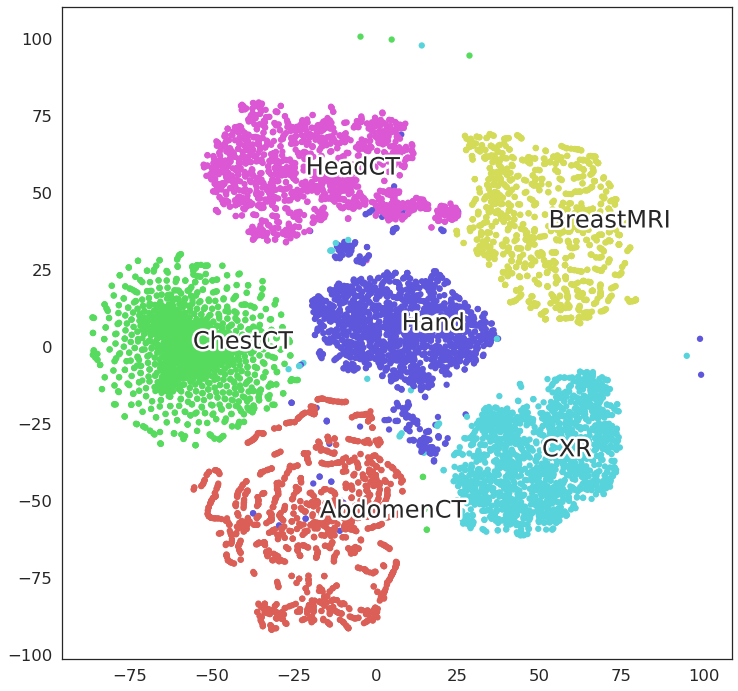

In [237]:
fig, _, _, _ = medical_scatter(medical_tsne, y_subset)

In [238]:
# fig.savefig('./Report/plots/medical_tSNE_5000datapoints', dpi = 300, bbox_inches='tight')

# Strategy 1: PCA
### Do PCA on full dataset X_train  and get result in low dimension. Then fit the transform on X_test and using the otained features carry out all algorithms like bayes, naive bayes etc etc

In [15]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=4)
# print(X_train.shape)
# assert(np.concatenate((X_train,X_test), axis = 0).shape == (X_test.shape[0]+X_train.shape[0], X_test.shape[1]))
pca_result = pca.fit_transform(X_train)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 61.89353036880493 seconds


In [16]:
print(pca_result.shape)
print(pca_result[0:10])

(47163, 4)
[[ 4473.19114963 -1091.20410514 -2320.94540607   217.17546787]
 [ 1738.56252449  1114.2320384    679.38380673   -99.27500974]
 [-3612.97699343  1042.72181217  -329.47053728 -1119.72209547]
 [-2000.39789175 -2501.39869563  -352.67674312   841.1963523 ]
 [ 5721.69955675  -417.58236361 -1435.73982807  -828.29030004]
 [ 2321.03904588  1386.2382675    256.66949113   648.3857151 ]
 [-2493.05658433  -536.94134538  1091.05944401    51.76380545]
 [-1857.37097524   132.8692945   1084.91509156 -1431.791277  ]
 [  978.93572643  1003.34116805    99.59139401   680.70756216]
 [ 2292.40395225  1416.84871903   393.27391073   562.58201228]]


In [17]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]
print(pca_result.shape)
print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

(47163, 4)
Variance explained per principal component: [0.46764199 0.11281346 0.05098048 0.03672475]


In [18]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
#apply the pca transform to the test data

test_pca = pca.transform(X_test)

#we are doing it for 2 pca components only currently
#we will also normalize the data to make mean 0 and std 1 for the columns

def normalize(x):
    return (x-x.mean(axis = 0))/(x.std(axis = 0))

X_train_pca = normalize(top_two_comp.values)
X_test_pca = normalize(test_pca[:,[0,1]])

#NOTE:Y_train and y_test remain same as before
print(X_train_pca.shape, X_test_pca.shape, y_train.shape, y_test.shape)
# print(X_train_pca[0:10])

(47163, 2) (11791, 2) (47163,) (11791,)


Number of unique classes are = 6


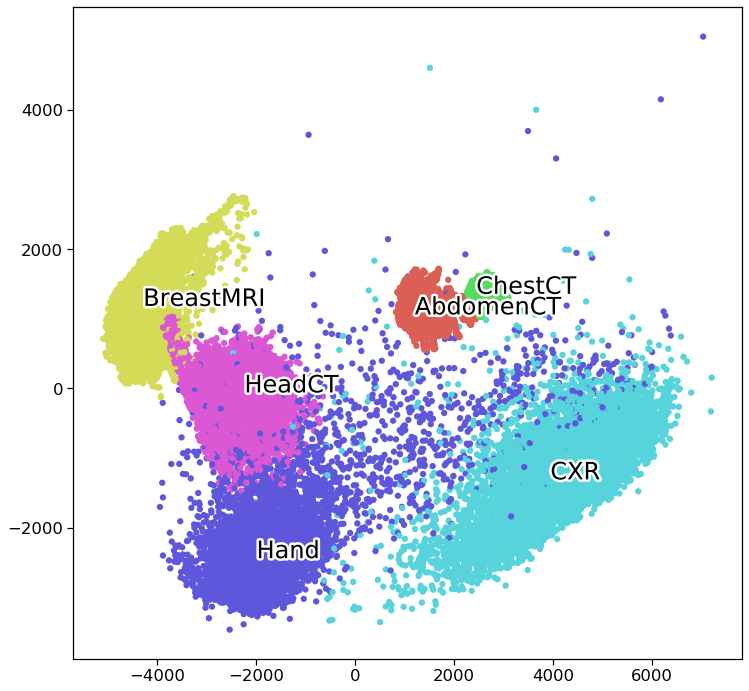

In [21]:
fig, _, _, _ = medical_scatter(top_two_comp.values,y_train) # Visualizing the PCA outputa

In [236]:
# fig.savefig('./Report/plots/Medical_pca.jpeg', dpi = 300, bbox_inches = 'tight')

In the above plots we se that the different classes are separating quite nicely which makes us believe that the 
accuracies of common algorithms, like bayes, naive bayes etc with gaussians as ccd shoudl be good if the gaussian will be able to model wach class. on pca data

We will see that with just 2 components we get good accuracies, but after running the experiments a question that arises is why does 2 components which explain 58 % (not very large) of the data variance are able to get such good accuracies ~ 97%?

In [209]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=4)
# print(X_train.shape)
# assert(np.concatenate((X_train,X_test), axis = 0).shape == (X_test.shape[0]+X_train.shape[0], X_test.shape[1]))
pca_result = pca.fit_transform(X_train[np.where(y_train!=4)])

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 62.05893564224243 seconds


In [210]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]
print(pca_result.shape)
print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

(39163, 4)
Variance explained per principal component: [0.53894874 0.07995805 0.05248559 0.02806819]


100 component pca

In [215]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=100)
# print(X_train.shape)
# assert(np.concatenate((X_train,X_test), axis = 0).shape == (X_test.shape[0]+X_train.shape[0], X_test.shape[1]))
pca_result = pca.fit_transform(X_train)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 20.637280225753784 seconds


In [217]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]
print(pca_result.shape)
print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_.cumsum()))

(47163, 100)
Variance explained per principal component: [0.46913582 0.58132218 0.63262822 0.66828998 0.68841529 0.70719674
 0.72316234 0.73642792 0.74860619 0.75895898 0.76673316 0.77417262
 0.78105397 0.78682763 0.79241979 0.7975357  0.802396   0.80680721
 0.81054209 0.81415099 0.81754986 0.82085548 0.82402643 0.82686418
 0.82967206 0.83240795 0.83506677 0.83752312 0.83988033 0.84220689
 0.84447794 0.84673403 0.84877325 0.85078161 0.85269948 0.85454668
 0.85637667 0.85810856 0.85982526 0.86138733 0.86289827 0.8643819
 0.8658222  0.86723988 0.86864606 0.87000387 0.87134218 0.8726002
 0.87383195 0.87503516 0.87621401 0.87736531 0.87849588 0.87959092
 0.88066934 0.88171002 0.88273824 0.88374321 0.88472671 0.8856994
 0.88665512 0.88759524 0.88851277 0.88940715 0.89028031 0.8911216
 0.89196056 0.89276874 0.89356545 0.89434157 0.8951147  0.89586125
 0.89659742 0.89731655 0.89801895 0.89871946 0.89940869 0.90008682
 0.90075918 0.90141661 0.9020658  0.90270229 0.90333268 0.90395757
 0.904576

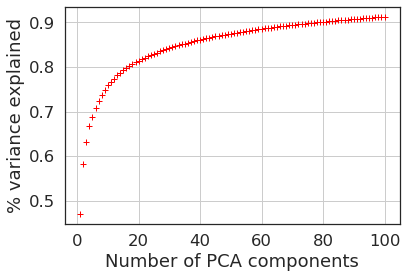

In [229]:
cumvariance = pca.explained_variance_ratio_.cumsum()
plt.plot([i+1 for i in range(len(cumvariance))], cumvariance, 'r+')
plt.xlabel('Number of PCA components')
plt.ylabel('% variance explained')
plt.grid(True)
# plt.savefig('./Report/plots/Medical_var_vs_pcacomponents.jpeg', dpi = 300, bbox_inches='tight')

# Naive Bayes Classifier on PCA data - with Gaussian or some other density functions as density estimates of individual features for a particular class

### MLE

In [56]:
def get_naive_params(X, y):
    params = []
    for i in range(numcat):
        mu = np.mean(X[np.where(y == i)], axis = 0)
        var = np.var(X[np.where(y == i)], axis = 0)
#         print(mu.shape, var.shape)
        assert(mu.shape == var.shape and mu.shape == (X.shape[1],))
        params.append({'mu':mu, 'var':var})
    return params

def performance_metrics_multiclass(y_pred_test, y_test, num_class, disp_conf = True):
    '''gives the TPR, FPR, acc, precision, recall and F1 score for all classes by comparing the 2 input arrays'''
    #First we calculate the confusion matrix of size num_class*num_class
    #NOTE: Y axis of matrix will be predicted class and x axis wll be true class
    conf_mat = np.zeros((num_class, num_class))
    
    for i in range(num_class):
        for j in range(num_class):
            conf_mat[i, j] = np.logical_and(y_pred_test == i, y_test ==j).sum()
    # Calculating precision, recall, F1 Score for each class
    colnames = ['class', 'Precision', 'Recall', 'F1']
    df = pd.DataFrame(columns = colnames)
    for i in range(num_class):
        TP = conf_mat[i, i]
        FP = conf_mat[i].sum() - conf_mat[i, i]
        TN = conf_mat.sum() - conf_mat[i].sum() - conf_mat[:, i].sum() +  conf_mat[i, i]
        FN = conf_mat[:, i].sum() - conf_mat[i, i]
        P = round((TP)/(TP+FP), 5)
        R = round((TP)/(TP+FN), 5)
        F1 = round(2*P*R/(P+R), 5)
        df = df.append({'class':categories[i], 'Precision':P, 'Recall':R, 'F1':F1 }, ignore_index = True)
    macroF1 = round(df['F1'].mean(), 5)
    accuracy = round((y_pred_test==y_test).mean(), 5)
    
    # NOTE : returning the transpose of the confusion matricx to get true labels on the y axis
    conf_mat = conf_mat.T
    # NORMALIZING the confusion matrix
    conf_mat = np.around(conf_mat/(conf_mat.sum(axis = 1)), decimals = 3)
    
    
    #PLot the matrix if disp_conf = True
    if(disp_conf == True):
        ax = sb.heatmap(conf_mat, vmin = 0, vmax = 1, cmap = sb.light_palette("seagreen", as_cmap=True), xticklabels = categories, yticklabels = categories, annot = True, annot_kws={"size": 12})
    #     ax.figure.axes[-1].yaxis.label.set_size(12)
        plt.xlabel('Predicted Labels', fontsize = 14)
        plt.ylabel('True Labels', fontsize = 14)
        plt.tick_params(axis='both', labelsize=10)
        return conf_mat, df, macroF1, accuracy, plt
    
    return conf_mat, df, macroF1, accuracy

def getpriors(y_train):
#     priors = [X_train_0.shape[0]/(X_train_1.shape[0] + X_train_0.shape[0]), X_train_1.shape[0]/(X_train_1.shape[0] + X_train_0.shape[0])]
    priors = [(y_train==i).sum()/y_train.shape[0] for i in range(6)]
        
    return priors

def gaussian_univariate(x, mu, var):
    """ to get the value of pdf having scalar params mu and var, @x """
    diff = (x - mu)
    pdf_x = (1/(np.sqrt(2*np.pi)))* (1/np.sqrt(var)) * (np.exp(-0.5*(diff**2)/(var)))
    return pdf_x.item()

def naive_likelihood(x, mu_array, var_array):
    '''mu_array, and var_array are d dimensional array where d is the size of x which is the number of features'''
    likelihood = 1
    for i in range(x.shape[0]):
        likelihood = likelihood * gaussian_univariate(x[i], mu_array[i], var_array[i])
    
    return likelihood
        
def predict_naive(X_test, priors, naive_params):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            assert(X_test[i].shape == (X_test.shape[1],))
            lik = naive_likelihood(X_test[i], naive_params[j]['mu'], naive_params[j]['var'])
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j
    return y_pred_test

In [57]:
# print((y_test<=6).sum())
# print(np.where(X_test_pca[:,0]>=0))

## Cross Validating Naive Bayes
we finally need, 
1. 5 fold cross validation train and test( should be validation) accuracies.
2. confusion maatrix for 80percent train and 20 percent test data - and get per class precision recall and F1 and finally macro F1

In [58]:
def cross_validate_naivebayes(X_train, y_train ,k): 
    #data is already shuffled before so no need to do that again
    
    #Kfoldsplit is a list of k (almost) equal sized parts of the np array
    Kfoldsplit_X = np.array_split(X_train, k, axis = 0)
    Kfoldsplit_y = np.array_split(y_train, k, axis = 0)
    
    #Use test_score and train_score to store the metric you want to analyse i.e. accuracy, precision, 
    cv_train_accuracy = 0  
    cv_valid_accuracy = 0
    for i in range(k):
        #make train and validation sets
        print('Fold {} running'.format(i+1))
        valid_X, valid_y = Kfoldsplit_X[i], Kfoldsplit_y[i]
        train_X, train_y = np.concatenate(Kfoldsplit_X[:i]+Kfoldsplit_X[i+1:], axis = 0), np.concatenate(Kfoldsplit_y[:i]+Kfoldsplit_y[i+1:], axis = 0)
        #training phase
        priors_naive = getpriors(train_y)
        naive_params = get_naive_params(train_X, train_y)
        
        #validation stats
        y_pred_valid_naive = predict_naive(valid_X, priors_naive, naive_params)
        conf_mat, stats_df, macroF1, accuracy_valid = performance_metrics_multiclass(y_pred_valid_naive, valid_y, numcat, False)
        
        #train stats
        y_pred_train_naive = predict_naive(train_X, priors_naive, naive_params)
        conf_mat, stats_df, macroF1, accuracy_train = performance_metrics_multiclass(y_pred_train_naive, train_y, numcat, False)
        
        cv_train_accuracy += accuracy_train   
        cv_valid_accuracy += accuracy_valid
    print('Cross Validation train accuracy = {}, test accuracy = {}'.format(cv_train_accuracy/k, cv_valid_accuracy/k))        
    return round(cv_train_accuracy/k, 3), round(cv_valid_accuracy/k, 3)

In [59]:
cross_validate_naivebayes(X_train_pca, y_train, 5)

Fold 1 running
Fold 2 running
Fold 3 running
Fold 4 running
Fold 5 running
Cross Validation train accuracy = 0.964008, test accuracy = 0.9639099999999999


(0.964, 0.964)

note: Above, cross validation test accuracy means average validation accuracy of k folds

## Testing for Naive Bayes

In [60]:
priors_naive = getpriors(y_train)
naive_params = get_naive_params(X_train_pca, y_train)

Test data Stats
Macro F1 = 0.96523, Accuracy = 0.9654
       class  Precision   Recall       F1
0  AbdomenCT    0.99346  0.98750  0.99047
1  BreastMRI    0.93951  0.99721  0.96750
2    ChestCT    0.98715  0.99900  0.99304
3        CXR    0.94709  0.97550  0.96109
4       Hand    0.95707  0.91400  0.93504
5     HeadCT    0.96698  0.92250  0.94422


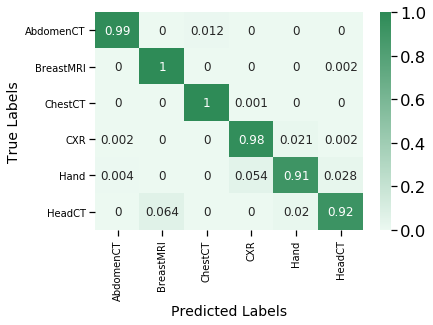


 Train data Stats
Macro F1 = 0.96378, Accuracy = 0.96398
       class  Precision   Recall       F1
0  AbdomenCT    0.99522  0.98875  0.99197
1  BreastMRI    0.93434  0.99735  0.96482
2    ChestCT    0.98874  0.99912  0.99390
3        CXR    0.94378  0.97150  0.95744
4       Hand    0.95418  0.91100  0.93209
5     HeadCT    0.96650  0.91962  0.94248


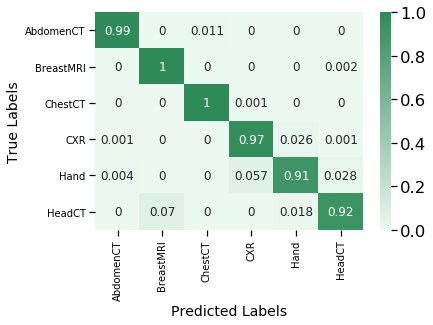

In [61]:
print('Test data Stats')
y_pred_test_naive = predict_naive(X_test_pca, priors_naive, naive_params)
conf_mat, stats_df, macroF1, accuracy, plt = performance_metrics_multiclass(y_pred_test_naive, y_test, numcat, True)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1, accuracy))
print(stats_df)
# stats_df.to_csv('./Report/csvfiles/medical_naivebayes_test.csv')
# plt.savefig('./Report/plots/Medical_naive_confmat_test.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

print('\n Train data Stats')
y_pred_train_naive = predict_naive(X_train_pca, priors_naive, naive_params)
conf_mat, stats_df, macroF1, accuracy, plt = performance_metrics_multiclass(y_pred_train_naive, y_train, numcat, True)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1, accuracy))
print(stats_df)
# stats_df.to_csv('./Report/csvfiles/medical_naivebayes_train.csv')
# plt.savefig('./Report/plots/Medical_naive_confmat_train.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

# Bayes Classifier - with (multivariate) Gaussian as class conditional densities

### MLE: 

In [29]:
def gaussian_multivariate(x, mu, sigma):
    """ to get the value of pdf having params mu and sigma, @x """
    dim = len(x)
    diff = (x - mu).reshape((-1,1))
    pdf_x = (1/((np.sqrt(2*np.pi))**dim))* (1/np.sqrt(np.linalg.det(sigma))) * (np.exp(-0.5*(diff.T).dot(np.linalg.inv(sigma).dot(diff))))
    return pdf_x.item()

def get_normal(X, y):
    params = []
    for i in range(numcat):
        mu = np.mean(X[np.where(y == i)], axis = 0)
        sigma = np.cov(X[np.where(y == i)].T)
        params.append({'mu':mu, 'sigma':sigma})
    return params
    
def predict_normal(X_test, priors, norm_params):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            lik =  gaussian_multivariate(X_test[i], norm_params[j]['mu'], norm_params[j]['sigma'])
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j
    return y_pred_test

## Cross Validating Bayes
we finally need, 
1. 5 fold cross validation train and test( should be validation) accuracies.
2. confusion maatrix for 80percent train and 20 percent test data - and get per class precision recall and F1 and finally macro F1

In [66]:
def cross_validate_bayes(X_train, y_train ,k): 
    #data is already shuffled before so no need to do that again
    
    #Kfoldsplit is a list of k (almost) equal sized parts of the np array
    Kfoldsplit_X = np.array_split(X_train, k, axis = 0)
    Kfoldsplit_y = np.array_split(y_train, k, axis = 0)
    
    #Use test_score and train_score to store the metric you want to analyse i.e. accuracy, precision, 
    cv_train_accuracy = 0  
    cv_valid_accuracy = 0
    for i in range(k):
        print('Fold {} running'.format(i+1))

        #make train and validation sets
        valid_X, valid_y = Kfoldsplit_X[i], Kfoldsplit_y[i]
        train_X, train_y = np.concatenate(Kfoldsplit_X[:i]+Kfoldsplit_X[i+1:], axis = 0), np.concatenate(Kfoldsplit_y[:i]+Kfoldsplit_y[i+1:], axis = 0)
        #training phase
        priors_multivariate =  getpriors(train_y)
        norm_params = get_normal(train_X, train_y)
        
        #validation stats
        y_pred_valid_normal = predict_normal(valid_X, priors_multivariate, norm_params)
        conf_mat, stats_df, macroF1, accuracy_valid = performance_metrics_multiclass(y_pred_valid_normal, valid_y, numcat, False)
        
        #train stats
        y_pred_train_normal = predict_normal(train_X, priors_multivariate, norm_params)
        conf_mat, stats_df, macroF1, accuracy_train = performance_metrics_multiclass(y_pred_train_normal, train_y, numcat, False)
        
        cv_train_accuracy += accuracy_train   
        cv_valid_accuracy += accuracy_valid
    print('Cross Validation train accuracy = {}, test accuracy = {}'.format(cv_train_accuracy/k, cv_valid_accuracy/k))        
    return round(cv_train_accuracy/k, 5), round(cv_valid_accuracy/k, 5)

In [67]:
cross_validate_bayes(X_train_pca, y_train, 5)

Fold 1 running
Fold 2 running
Fold 3 running
Fold 4 running
Fold 5 running
Cross Validation train accuracy = 0.9707520000000001, test accuracy = 0.9708020000000002


(0.97075, 0.9708)

## Testing Bayes

In [68]:
priors_multivariate =  getpriors(y_train)
norm_params = get_normal(X_train_pca, y_train)

Test Data Stats
Macro F1 = 0.97064, Accuracy = 0.97083
       class  Precision   Recall       F1
0  AbdomenCT    0.99346  0.98750  0.99047
1  BreastMRI    0.94700  0.98772  0.96693
2    ChestCT    0.98716  0.99950  0.99329
3        CXR    0.96801  0.98350  0.97569
4       Hand    0.97379  0.92900  0.95087
5     HeadCT    0.95381  0.93950  0.94660


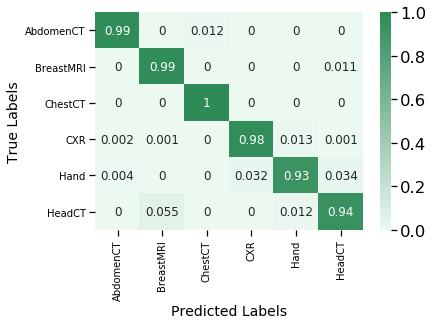


Train Data Stats
Macro F1 = 0.97049, Accuracy = 0.9707
       class  Precision   Recall       F1
0  AbdomenCT    0.99535  0.98912  0.99223
1  BreastMRI    0.94416  0.98674  0.96498
2    ChestCT    0.98899  0.99950  0.99422
3        CXR    0.96446  0.98375  0.97401
4       Hand    0.97718  0.92588  0.95084
5     HeadCT    0.95254  0.94088  0.94667


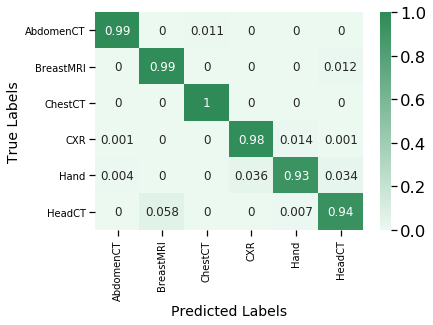

In [69]:
print('Test Data Stats')
y_pred_test_normal = predict_normal(X_test_pca, priors_multivariate, norm_params)
conf_mat_norm, stats_df_norm, macroF1_norm, accuracy_norm, plt = performance_metrics_multiclass(y_pred_test_normal, y_test, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm, accuracy_norm))
print(stats_df_norm)
# stats_df_norm.to_csv('./Report/csvfiles/medical_bayes_test.csv')
# plt.savefig('./Report/plots/Medical_bayes_confmat_test.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

print('\nTrain Data Stats')
y_pred_train_normal = predict_normal(X_train_pca, priors_multivariate, norm_params)
conf_mat_norm, stats_df_norm, macroF1_norm, accuracy_norm, plt = performance_metrics_multiclass(y_pred_train_normal, y_train, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm, accuracy_norm))
print(stats_df_norm)
# stats_df_norm.to_csv('./Report/csvfiles/medical_bayes_train.csv')
# plt.savefig('./Report/plots/Medical_bayes_confmat_train.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()


# Bayes Classifier - with GMM as class conditional densities

### Useful functions (EM algorithm and other functions for support)

In [79]:
# Fro this we will use a subset of dataset to make it computationally tractable
n = 25
X_train_gmm = X_train_pca[0:X_train_pca.shape[0]//n]
y_train_gmm = y_train[0:X_train_pca.shape[0]//n]
# X_test_gmm = X_test_pca[0:X_test_pca.shape[0]//n]
# y_test_gmm = y_test[0:X_test_pca.shape[0]//n]

In [94]:
def random_params(k, data):
    pi = np.ones(k)*(1.0/k)
    cols = data.shape[1]
    mu = np.zeros((k, cols))    #mean of k clusters
    for k_ in range(k):
        randnum = np.floor(np.random.random()*len(data))
        for col in range(cols):
            mu[k_][col] += (data[int(randnum)][col])
    
    sigma = []
    #Initializing sigma as covariance of data only for all gaussians
    for i in range(k):
        sigma.append(np.cov(data.T))
    sigma = np.array(sigma)
    
    return pi, mu, sigma


def likelihood(x, pi, mu, sigma, k):
    sum = 0.
    for k_ in range(k):
        sum += pi[k_]*gaussian_multivariate(x, mu[k_], sigma[k_])
    
    return sum.item()

                
def Estep(pi, mu, sigma, k, data):
    N = data.shape[0]
    mem_wts = np.zeros((N, k))
    #storing member weights in an N*k matrix
    for k_ in range(k):
        for n in range(N):
            mem_wts[n,k_] = pi[k_]*gaussian_multivariate(data[n], mu[k_], sigma[k_])/(likelihood(data[n], pi, mu, sigma, k))      
                
    return mem_wts

def Mstep(mem_wts, k, data):
    N = data.shape[0]
    columns = data.shape[1]    
    mu = np.zeros((k, columns))
    sigma = np.zeros((k, columns, columns))
    pi = np.zeros(k)
    for k_ in range(k):
        mem_wts_k_ = mem_wts[:,k_].reshape(N, 1)
        Nk_ = mem_wts_k_.sum()
        pi[k_] = (Nk_)/N
        mu[k_] = (1/Nk_)*(((mem_wts_k_.T).dot(data)).sum(axis=0))
    
    for k_ in range(k):
        mem_wts_k_ = mem_wts[:,k_].reshape(N, 1)
        Nk_ = mem_wts_k_.sum()
        for n in range(N):
            diff = (data[n] - mu[k_]).reshape((-1,1))
            sigma[k_] += (mem_wts_k_[n,0])*(diff.dot(diff.T))
        sigma[k_] /= Nk_
        assert(sigma[k_].shape==(columns,columns))
                
    return pi, mu, sigma

def log_lik(pi, mu, sigma, k, data):
    log_lik = 0.
    
    for n in range(data.shape[0]):
#         print(likelihood(data[n], pi, mu, sigma, k))
        log_lik += np.log(likelihood(data[n], pi, mu, sigma, k))
    return log_lik

def EM(data, k, thresh, iter_max, dispfig = True):
#     initialize array - pi, mu, sigmas having parameters for all the gaussians (k in number)
#     print(data[1].shape)
    pi, mu, sigma = random_params(k, data)
    log_lik_list = []
    log_lik_curr = log_lik(pi, mu, sigma, k, data)
    print('-'*50)
    for i in range(iter_max):
        log_lik_list.append(log_lik_curr)
        if(i%10 == 0 and dispfig == True):
            print("iteration No. {}----------LogLikelihood = {}".format(i, log_lik_curr))
        mem_wts = Estep(pi, mu, sigma, k, data) #membership weights calculated in the E step
        pi, mu, sigma = Mstep(mem_wts, k, data) #used the membership weights to get new pi, mu, sigma
        
        #calculate new log likelihood
        log_lik_new = log_lik(pi, mu, sigma, k, data)
        
#         check if model has converged
        if(abs(log_lik_new-log_lik_curr) < thresh):
            break
        
        #update log likelihood
        log_lik_curr = log_lik_new
    print('-'*50)
#     print("EM completed")
    if(dispfig == True):
        plt.plot(log_lik_list)
        plt.ylabel('Log_Likelihood')
        plt.xlabel('Iterations')
        plt.title('Log_likelihood vs number of iterations in EM algorithm')
        plt.show()
    print('Final log likelihood = {}'.format(log_lik_curr))
    return {'pi':pi, 'mu':mu, 'sigma':sigma}

def prediction_gmm(X_test, priors, gmm_params, num_gauss):
    y_pred_test = np.zeros((X_test.shape[0],))
#     print(thresh)
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            lik = likelihood(X_test[i], gmm_params[j]['pi'], gmm_params[j]['mu'], gmm_params[j]['sigma'], num_gauss)
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j            
    return y_pred_test

def get_gmm_params(X_train, y_train, num_gauss, iter_max, stop_thresh, dispfig = True):
    '''Function that takes input hyperparameters, along with training data to give out the parameters for GMM'''
    gmm_params = []
    for i in range(numcat):
        gmm_params_i = EM(X_train[np.where(y_train==i)], num_gauss, stop_thresh, iter_max, dispfig)
        gmm_params.append(gmm_params_i)
    
    return gmm_params

### Bias Variance curve for selecting ideal number of gaussians
Overfitting GMM by increasing number of gaussians. Plot the bias variance curves
Note: the code will take time to run

In [193]:
train_acc_list = []
valid_acc_list = []

In [194]:
#We will nto cross validate due to large time in running gmm, 
#rather we will use just one validation and one train set to get the curve
X_bv_train = X_train_gmm[0:(X_train_gmm.shape[0]*4)//5]
y_bv_train = y_train_gmm[0:(X_train_gmm.shape[0]*4)//5]
X_bv_valid = X_train_gmm[(X_train_gmm.shape[0]*4)//5:]
y_bv_valid = y_train_gmm[(X_train_gmm.shape[0]*4)//5:]

print('EM will take time please wait patiently')
for num_gaussians in [1, 2, 3, 5]:
    print('Running EM for estimating gaussian mixture with {} gaussians for each class'.format(num_gaussians))
    
#     print('Doing EM for {} gaussians'.format(num_gaussians))
    gmm_params = get_gmm_params(X_bv_train, y_bv_train, num_gauss = num_gaussians, iter_max = 100, stop_thresh = 0.0001, dispfig = False)
    priors = priors_naive = getpriors(y_bv_train)
    
    # for validation data
    y_pred_valid_gmm = prediction_gmm(X_bv_valid, priors, gmm_params, num_gaussians)
    conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_valid_gmm, y_bv_valid, numcat, False)
#     print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
#     stats_df_norm_gmm
    valid_acc_list.append(accuracy_norm_gmm)
    
    # for train data - 
    y_pred_train_gmm = prediction_gmm(X_bv_train, priors, gmm_params, num_gaussians)
    conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_train_gmm, y_bv_train, numcat, False)
#     print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
#     stats_df_norm_gmm    
    train_acc_list.append(accuracy_norm_gmm)

EM will take time please wait patiently
Running EM for estimating gaussian mixture with 1 gaussians for each class
--------------------------------------------------
--------------------------------------------------
Final log likelihood = 424.6851016710798
--------------------------------------------------
--------------------------------------------------
Final log likelihood = 62.899467628637105
--------------------------------------------------
--------------------------------------------------
Final log likelihood = 833.8608296491818
--------------------------------------------------
--------------------------------------------------
Final log likelihood = -199.14436227125694
--------------------------------------------------
--------------------------------------------------
Final log likelihood = -350.5877206364871
--------------------------------------------------
--------------------------------------------------
Final log likelihood = 8.41470772804394
Running EM for estimatin

/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


--------------------------------------------------
Final log likelihood = nan
--------------------------------------------------
--------------------------------------------------
Final log likelihood = -87.25470663388924
--------------------------------------------------
--------------------------------------------------
Final log likelihood = 89.30488517754662


/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


In [195]:
print(train_acc_list)

[0.96883, 0.97347, 0.97812, 0.83488]


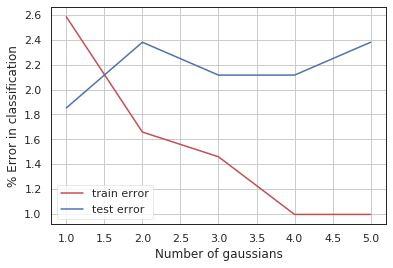

In [219]:
train_error = 1 - np.array(train_acc_list)
test_error = 1 - np.array(valid_acc_list)
number_of_gaussians = [1, 2, 3, 4, 5]
plt.plot(number_of_gaussians, train_error*100, label = 'train error', color = 'r')
plt.plot(number_of_gaussians, test_error*100, label = 'test error', color = 'b')
plt.xlabel('Number of gaussians')
plt.ylabel('% Error in classification')
ax = plt.gca()
# ax.set_facecolor('white')
ax.grid(b=True, which='major', linestyle='-')
sb.set_style("white")
plt.legend()

From the abouve plot we see that for the Bayes classifier, it is best to use 1 gaussian in GMM. Hence we find the statistics of the model using 1 gaussians.We test the model on a different test set to quantify the results.

Hence we conclude that the ideal numbre of gaussians should be 1 after which overfitting takes place

## Cross Validating Bayes (with GMM class cond densities)
we are using the optimal number of gaussians ie 2 as found above
we finally need, 
1. 5 fold cross validation train and test( should be validation) accuracies.
2. confusion maatrix for 80percent train and 20 percent test data - and get per class precision recall and F1 and finally macro F1

In [156]:
def cross_validate_gmmbayes(X_train, y_train ,k, num_gauss): 
    #data is already shuffled before so no need to do that again
    
    #Kfoldsplit is a list of k (almost) equal sized parts of the np array
    Kfoldsplit_X = np.array_split(X_train, k, axis = 0)
    Kfoldsplit_y = np.array_split(y_train, k, axis = 0)
    
    #Use test_score and train_score to store the metric you want to analyse i.e. accuracy, precision, 
    cv_train_accuracy = 0  
    cv_valid_accuracy = 0
    for i in range(k):
        #make train and validation sets
        valid_X, valid_y = Kfoldsplit_X[i], Kfoldsplit_y[i]
        train_X, train_y = np.concatenate(Kfoldsplit_X[:i]+Kfoldsplit_X[i+1:], axis = 0), np.concatenate(Kfoldsplit_y[:i]+Kfoldsplit_y[i+1:], axis = 0)
        #training phase
        priors_GMM = getpriors(train_y)
        gmm_params = get_gmm_params(train_X, train_y, num_gauss = 2, iter_max = 100, stop_thresh = 0.0001)
        
        #validation stats
        y_pred_valid_gmm = prediction_gmm(valid_X, priors_GMM, gmm_params, num_gauss = 2)
        conf_mat, stats_df, macroF1, accuracy_valid = performance_metrics_multiclass(y_pred_valid_gmm, valid_y, numcat, False)

        #train stats
        y_pred_train_gmm = prediction_gmm(train_X, priors_GMM, gmm_params, num_gauss = 2)
        conf_mat, stats_df, macroF1, accuracy_train = performance_metrics_multiclass(y_pred_train_gmm, train_y, numcat, False)
        
        cv_train_accuracy += accuracy_train   
        cv_valid_accuracy += accuracy_valid
    print('Cross Validation train accuracy = {}, test accuracy = {}'.format(cv_train_accuracy/k, cv_valid_accuracy/k))        
    return round(cv_train_accuracy/k, 5), round(cv_valid_accuracy/k, 5)

iteration     |    0    |     LogLikelihood = 297.53301881930133
iteration     |    10    |     LogLikelihood = 487.3941256180813
iteration     |    20    |     LogLikelihood = 488.9348784430238
iteration     |    30    |     LogLikelihood = 490.0243520188242
iteration     |    40    |     LogLikelihood = 490.32589786793164
iteration     |    50    |     LogLikelihood = 490.4062617907565
iteration     |    60    |     LogLikelihood = 490.43145448998564
iteration     |    70    |     LogLikelihood = 490.43965664344915
iteration     |    80    |     LogLikelihood = 490.44237053919227
EM completed


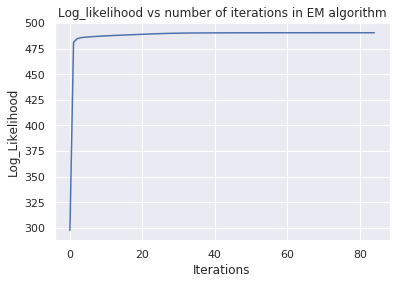

Final log likelihood = 490.44285345731726
iteration     |    0    |     LogLikelihood = -43.34368452647839
iteration     |    10    |     LogLikelihood = 105.83619206830373
iteration     |    20    |     LogLikelihood = 106.27598154553395
iteration     |    30    |     LogLikelihood = 106.31902165930197
iteration     |    40    |     LogLikelihood = 106.32355382516774
EM completed


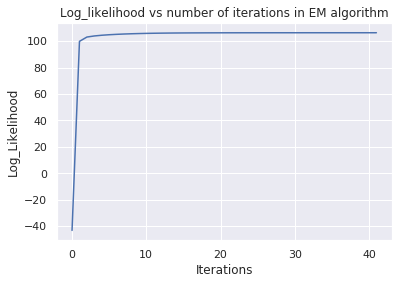

Final log likelihood = 106.32366511631639
iteration     |    0    |     LogLikelihood = 769.1315243456456
iteration     |    10    |     LogLikelihood = 908.7263971798651
iteration     |    20    |     LogLikelihood = 909.2831844192334
iteration     |    30    |     LogLikelihood = 909.4812109931224
iteration     |    40    |     LogLikelihood = 909.5694693657616
iteration     |    50    |     LogLikelihood = 909.6605938901118
iteration     |    60    |     LogLikelihood = 909.7790951145041
iteration     |    70    |     LogLikelihood = 909.9570885015586
iteration     |    80    |     LogLikelihood = 910.2257968745486
iteration     |    90    |     LogLikelihood = 910.5405139900286
EM completed


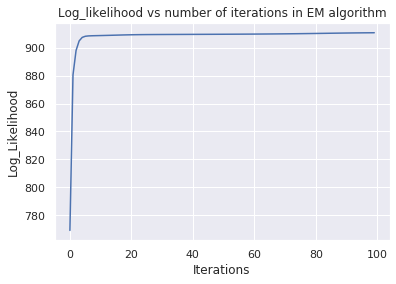

Final log likelihood = 910.7505211497419
iteration     |    0    |     LogLikelihood = -301.28128066157785
iteration     |    10    |     LogLikelihood = -151.63766200038575
iteration     |    20    |     LogLikelihood = -143.05811676803611
iteration     |    30    |     LogLikelihood = -141.42509426546965
iteration     |    40    |     LogLikelihood = -141.27453844824146
iteration     |    50    |     LogLikelihood = -141.219663417549
iteration     |    60    |     LogLikelihood = -141.2001848136691
iteration     |    70    |     LogLikelihood = -141.19355624680634
iteration     |    80    |     LogLikelihood = -141.19134274227312
EM completed


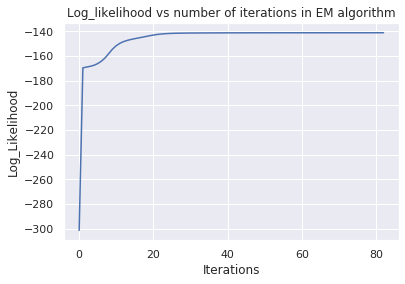

Final log likelihood = -141.1911252957036
iteration     |    0    |     LogLikelihood = -285.2499868834165
iteration     |    10    |     LogLikelihood = -207.10515835705493
iteration     |    20    |     LogLikelihood = -190.58990230854022
iteration     |    30    |     LogLikelihood = -117.2031237316675
iteration     |    40    |     LogLikelihood = -116.82041932926734
iteration     |    50    |     LogLikelihood = -116.81086040323741
EM completed


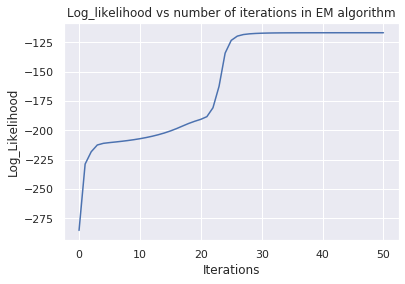

Final log likelihood = -116.81086040323741
iteration     |    0    |     LogLikelihood = 3.336526010745982
iteration     |    10    |     LogLikelihood = 52.33204468453571
iteration     |    20    |     LogLikelihood = 54.56562576426463
iteration     |    30    |     LogLikelihood = 57.20913747752248
iteration     |    40    |     LogLikelihood = 57.58803772558696
iteration     |    50    |     LogLikelihood = 57.602951769737714
EM completed


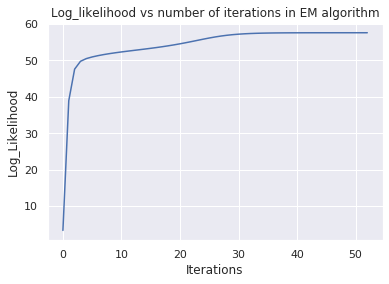

Final log likelihood = 57.60319887838408


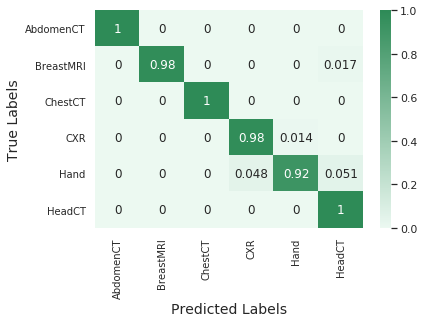

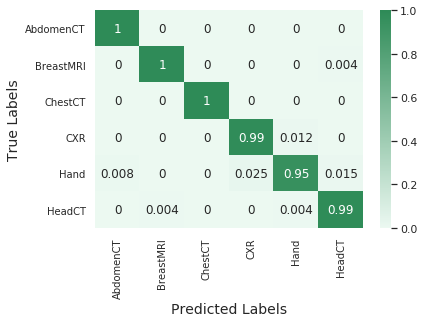

iteration     |    0    |     LogLikelihood = 163.42853128834093
iteration     |    10    |     LogLikelihood = 483.28992680425847
iteration     |    20    |     LogLikelihood = 485.10904152155416
iteration     |    30    |     LogLikelihood = 485.2292889585786
iteration     |    40    |     LogLikelihood = 485.25945837355584
iteration     |    50    |     LogLikelihood = 485.2674821339964
iteration     |    60    |     LogLikelihood = 485.2696651438495
EM completed


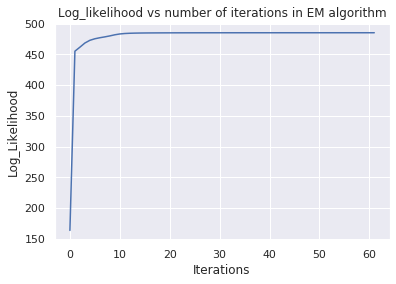

Final log likelihood = 485.2697654346106
iteration     |    0    |     LogLikelihood = 48.40304832164058
iteration     |    10    |     LogLikelihood = 115.40464725108825
iteration     |    20    |     LogLikelihood = 116.4958838960929
iteration     |    30    |     LogLikelihood = 116.63057150015868
iteration     |    40    |     LogLikelihood = 116.65074142999363
iteration     |    50    |     LogLikelihood = 116.653857961764
EM completed


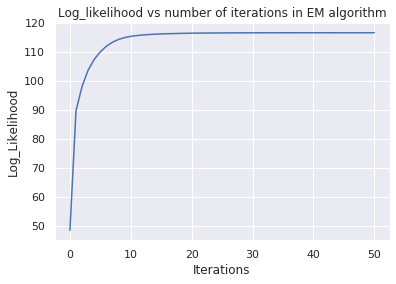

Final log likelihood = 116.653857961764
iteration     |    0    |     LogLikelihood = 882.7843080630339
iteration     |    10    |     LogLikelihood = 944.7867786346172
iteration     |    20    |     LogLikelihood = 950.3033920595087
iteration     |    30    |     LogLikelihood = 950.5537644266282
iteration     |    40    |     LogLikelihood = 950.61346781462
iteration     |    50    |     LogLikelihood = 950.6256187642904
EM completed


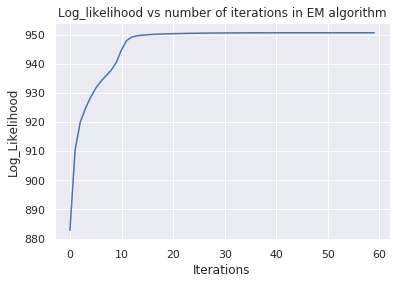

Final log likelihood = 950.6278146461245
iteration     |    0    |     LogLikelihood = -335.1107911131201
iteration     |    10    |     LogLikelihood = -124.60608991178543
iteration     |    20    |     LogLikelihood = -124.1820471782174
EM completed


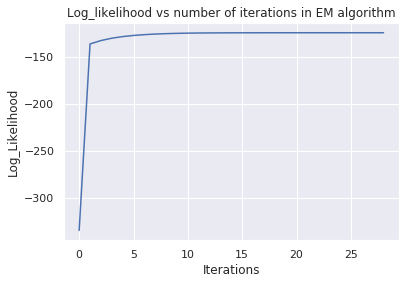

Final log likelihood = -124.17627957935267
iteration     |    0    |     LogLikelihood = -421.3717732423241
iteration     |    10    |     LogLikelihood = -149.02814142671778
iteration     |    20    |     LogLikelihood = -137.07051009902855
iteration     |    30    |     LogLikelihood = -136.96931817503057
EM completed


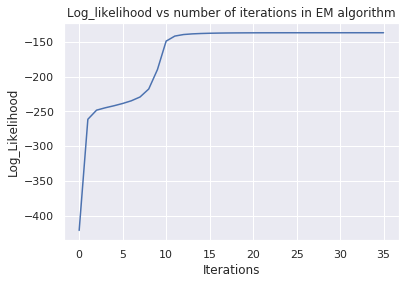

Final log likelihood = -136.9675045920642
iteration     |    0    |     LogLikelihood = -106.71668239299404
iteration     |    10    |     LogLikelihood = 40.79051774517933
iteration     |    20    |     LogLikelihood = 50.47504716061134
iteration     |    30    |     LogLikelihood = 59.61504369616485
iteration     |    40    |     LogLikelihood = 62.577166987255225
iteration     |    50    |     LogLikelihood = 63.73368494698178
iteration     |    60    |     LogLikelihood = 63.92676513204398
iteration     |    70    |     LogLikelihood = 63.94263270064298
EM completed


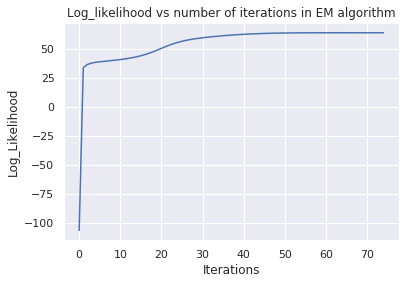

Final log likelihood = 63.94335159320243


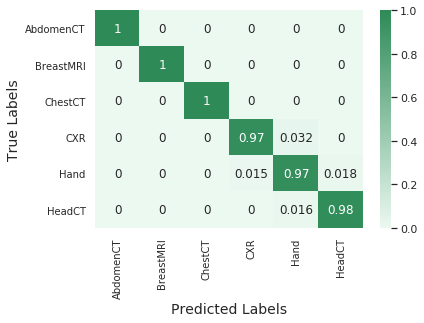

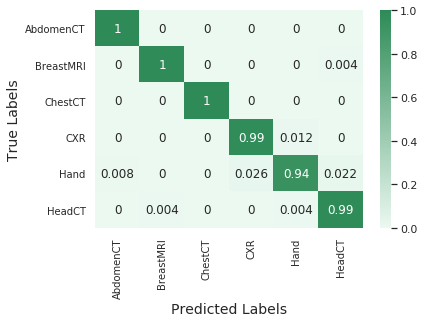

iteration     |    0    |     LogLikelihood = 343.94029352350384
iteration     |    10    |     LogLikelihood = 461.4661941800516
iteration     |    20    |     LogLikelihood = 461.6719933438088
iteration     |    30    |     LogLikelihood = 461.9836607444722
iteration     |    40    |     LogLikelihood = 462.4634079401729
iteration     |    50    |     LogLikelihood = 463.08027821603775
iteration     |    60    |     LogLikelihood = 463.94896204861266
iteration     |    70    |     LogLikelihood = 465.3984230124563
iteration     |    80    |     LogLikelihood = 466.5056913497077
iteration     |    90    |     LogLikelihood = 466.7099029457744
EM completed


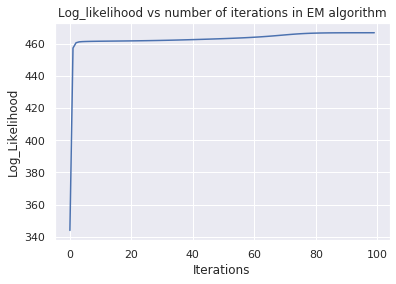

Final log likelihood = 466.7312916598876
iteration     |    0    |     LogLikelihood = 5.3072319522671005
iteration     |    10    |     LogLikelihood = 83.31614952946644
iteration     |    20    |     LogLikelihood = 85.01356793378649
iteration     |    30    |     LogLikelihood = 85.7813290936542
iteration     |    40    |     LogLikelihood = 87.0373875482456
iteration     |    50    |     LogLikelihood = 88.31079127016045
iteration     |    60    |     LogLikelihood = 88.80629152361774
iteration     |    70    |     LogLikelihood = 88.90683872547943
iteration     |    80    |     LogLikelihood = 88.92272683810125
EM completed


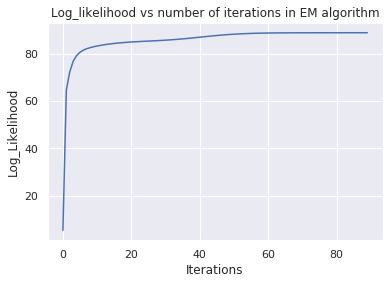

Final log likelihood = 88.92495680972715
iteration     |    0    |     LogLikelihood = 720.7580182547102
iteration     |    10    |     LogLikelihood = 921.713405264216
iteration     |    20    |     LogLikelihood = 922.1278524467904
iteration     |    30    |     LogLikelihood = 922.1974503341002
iteration     |    40    |     LogLikelihood = 922.2141239969512
iteration     |    50    |     LogLikelihood = 922.218759645495
EM completed


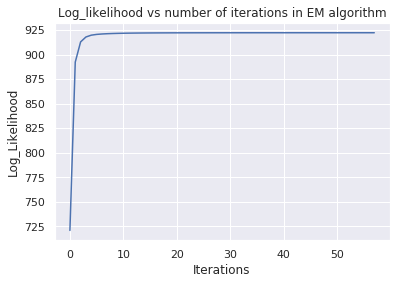

Final log likelihood = 922.2198861930385
iteration     |    0    |     LogLikelihood = -307.2389783484338
iteration     |    10    |     LogLikelihood = -167.41274754006014
iteration     |    20    |     LogLikelihood = -157.70827093525577
iteration     |    30    |     LogLikelihood = -157.22916081323362
iteration     |    40    |     LogLikelihood = -157.16280454316552
iteration     |    50    |     LogLikelihood = -157.10602723133817
iteration     |    60    |     LogLikelihood = -157.0170124607098
iteration     |    70    |     LogLikelihood = -156.8679989807806
iteration     |    80    |     LogLikelihood = -156.62718391311643
iteration     |    90    |     LogLikelihood = -156.2949130369468
EM completed


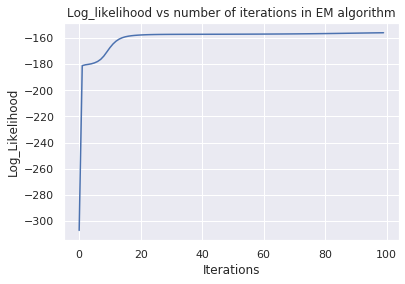

Final log likelihood = -155.96255446845936
iteration     |    0    |     LogLikelihood = -360.769209474503
iteration     |    10    |     LogLikelihood = -141.69827056532205
iteration     |    20    |     LogLikelihood = -141.61585151655956
iteration     |    30    |     LogLikelihood = -141.61015917449552
EM completed


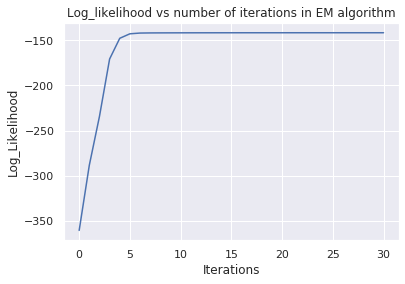

Final log likelihood = -141.61015917449552
iteration     |    0    |     LogLikelihood = -23.177032844182584
iteration     |    10    |     LogLikelihood = 55.93990252369906
iteration     |    20    |     LogLikelihood = 64.03790805260603
iteration     |    30    |     LogLikelihood = 67.83232549692477
iteration     |    40    |     LogLikelihood = 70.06890270160707
iteration     |    50    |     LogLikelihood = 74.54836235733359
iteration     |    60    |     LogLikelihood = 81.56016066873676
EM completed


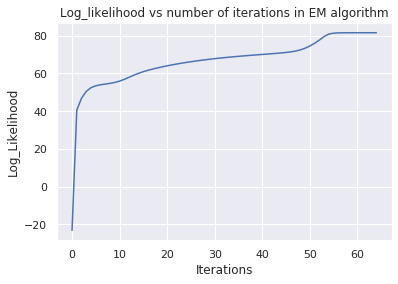

Final log likelihood = 81.56257017725564


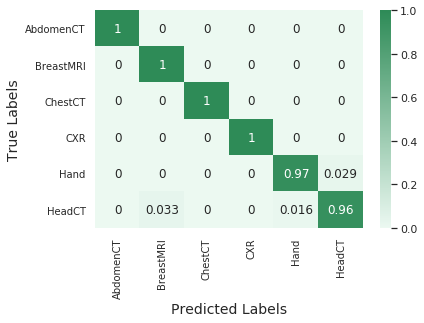

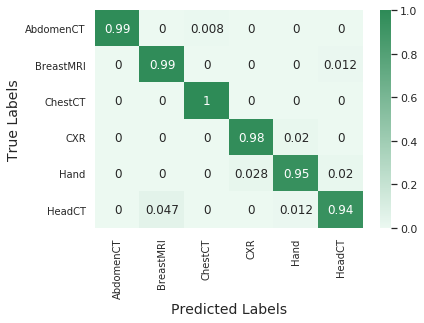

iteration     |    0    |     LogLikelihood = 333.0092318909006
iteration     |    10    |     LogLikelihood = 471.34386996719803
iteration     |    20    |     LogLikelihood = 471.5748045288478
iteration     |    30    |     LogLikelihood = 471.6188303442023
iteration     |    40    |     LogLikelihood = 471.63303037335214
iteration     |    50    |     LogLikelihood = 471.6383896547387
iteration     |    60    |     LogLikelihood = 471.6404427931441
EM completed


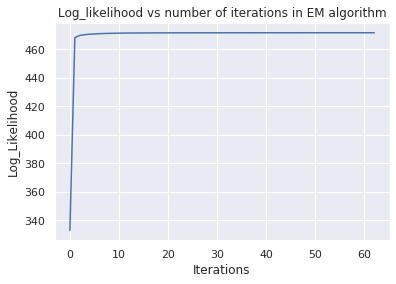

Final log likelihood = 471.64066448552086
iteration     |    0    |     LogLikelihood = 23.96010734374691
iteration     |    10    |     LogLikelihood = 104.79449206406565
iteration     |    20    |     LogLikelihood = 105.6213769763491
iteration     |    30    |     LogLikelihood = 105.69205671855524
iteration     |    40    |     LogLikelihood = 105.69794842262118
EM completed


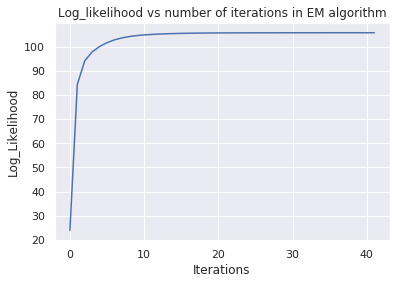

Final log likelihood = 105.6980653367368
iteration     |    0    |     LogLikelihood = 747.0431734736112
iteration     |    10    |     LogLikelihood = 931.2671362665773
iteration     |    20    |     LogLikelihood = 942.2896147289201
iteration     |    30    |     LogLikelihood = 942.3132404216791
EM completed


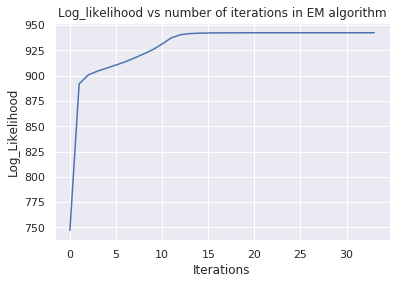

Final log likelihood = 942.3137389849599
iteration     |    0    |     LogLikelihood = -288.4555946812216
iteration     |    10    |     LogLikelihood = -144.23818148025856
iteration     |    20    |     LogLikelihood = -143.1839187338706
iteration     |    30    |     LogLikelihood = -141.04610396254952
iteration     |    40    |     LogLikelihood = -140.14481556844729
iteration     |    50    |     LogLikelihood = -139.8731138946409
iteration     |    60    |     LogLikelihood = -139.74682629503695
iteration     |    70    |     LogLikelihood = -139.68901407923704
iteration     |    80    |     LogLikelihood = -139.66305512590097
iteration     |    90    |     LogLikelihood = -139.6516001904552
EM completed


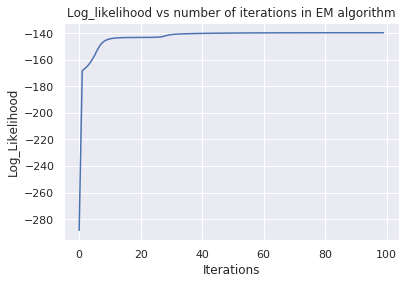

Final log likelihood = -139.64661439190607
iteration     |    0    |     LogLikelihood = -434.7518689602113
iteration     |    10    |     LogLikelihood = -108.46644639407091
iteration     |    20    |     LogLikelihood = -108.29359434979213
EM completed


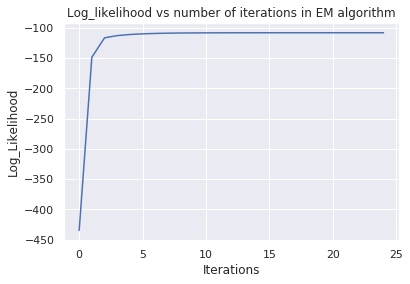

Final log likelihood = -108.29218926287736
iteration     |    0    |     LogLikelihood = -175.18127092736637
iteration     |    10    |     LogLikelihood = 70.92384785046637
iteration     |    20    |     LogLikelihood = 71.46688267789257
iteration     |    30    |     LogLikelihood = 71.61212148247243
iteration     |    40    |     LogLikelihood = 71.65981685561246
iteration     |    50    |     LogLikelihood = 71.67817920068528
iteration     |    60    |     LogLikelihood = 71.68619281638988
iteration     |    70    |     LogLikelihood = 71.69002911367762
iteration     |    80    |     LogLikelihood = 71.69199465891428
EM completed


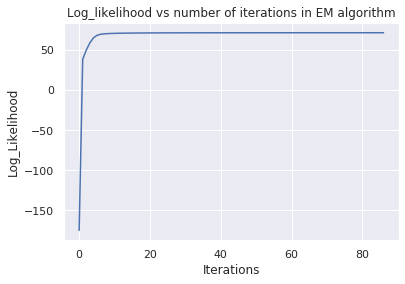

Final log likelihood = 71.69270369052037


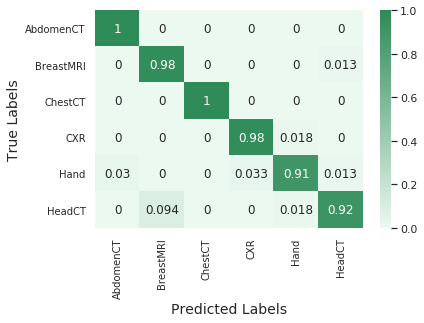

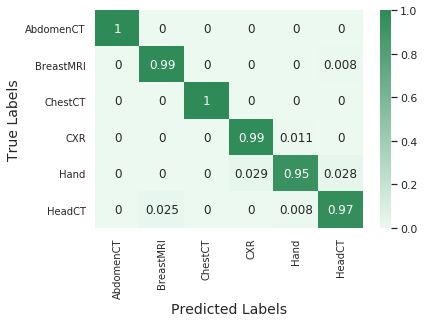

iteration     |    0    |     LogLikelihood = 329.53457329600974
iteration     |    10    |     LogLikelihood = 467.5067727271014
iteration     |    20    |     LogLikelihood = 469.6633982596817
iteration     |    30    |     LogLikelihood = 469.82845290976815
iteration     |    40    |     LogLikelihood = 469.8771684044708
iteration     |    50    |     LogLikelihood = 469.89426381532303
iteration     |    60    |     LogLikelihood = 469.8999870000992
iteration     |    70    |     LogLikelihood = 469.9018452888799
EM completed


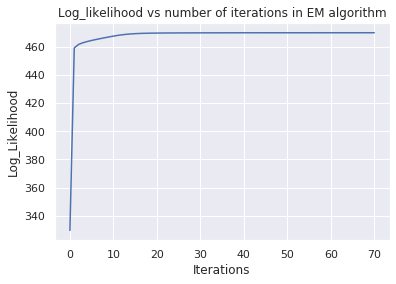

Final log likelihood = 469.9018452888799
iteration     |    0    |     LogLikelihood = -19.159843483232866
iteration     |    10    |     LogLikelihood = 109.40490599526862
iteration     |    20    |     LogLikelihood = 109.81933889829595
iteration     |    30    |     LogLikelihood = 109.85482882749301
EM completed


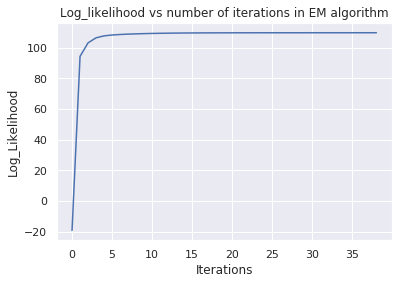

Final log likelihood = 109.857465256224
iteration     |    0    |     LogLikelihood = 685.7414851884018
iteration     |    10    |     LogLikelihood = 880.6893533109135
EM completed


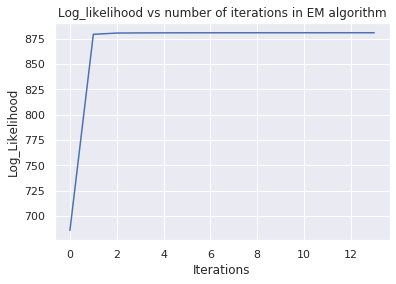

Final log likelihood = 880.6907175201667
iteration     |    0    |     LogLikelihood = -315.8598520890013
iteration     |    10    |     LogLikelihood = -155.78595613553284
iteration     |    20    |     LogLikelihood = -152.57768687178532
iteration     |    30    |     LogLikelihood = -150.20765611519408
iteration     |    40    |     LogLikelihood = -146.02360907267587
iteration     |    50    |     LogLikelihood = -145.0003033443208
iteration     |    60    |     LogLikelihood = -144.86446547403116
iteration     |    70    |     LogLikelihood = -144.83357213777555
iteration     |    80    |     LogLikelihood = -144.82620460366036
EM completed


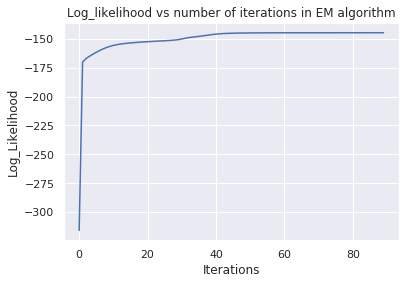

Final log likelihood = -144.82449958066303
iteration     |    0    |     LogLikelihood = -392.276529523564
iteration     |    10    |     LogLikelihood = -241.2794357148576
iteration     |    20    |     LogLikelihood = -234.60572610402244
iteration     |    30    |     LogLikelihood = -124.71427340418714
iteration     |    40    |     LogLikelihood = -124.19087974635501
EM completed


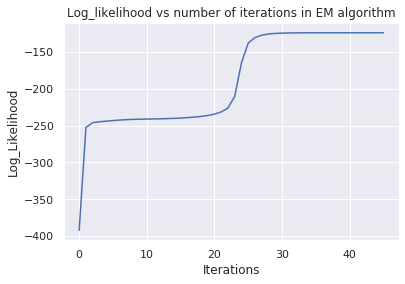

Final log likelihood = -124.18819131201153
iteration     |    0    |     LogLikelihood = -20.32152392520365
iteration     |    10    |     LogLikelihood = 54.261600217507215
iteration     |    20    |     LogLikelihood = 55.49034914023884
iteration     |    30    |     LogLikelihood = 56.70632926946761
iteration     |    40    |     LogLikelihood = 57.17251353944066
iteration     |    50    |     LogLikelihood = 57.25540422526287
iteration     |    60    |     LogLikelihood = 57.27086062541172
iteration     |    70    |     LogLikelihood = 57.274183059053904
EM completed


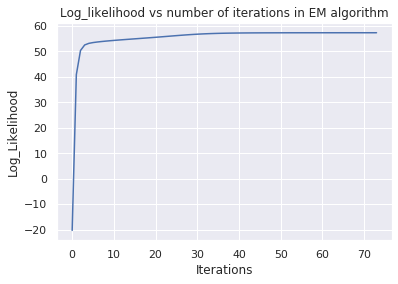

Final log likelihood = 57.27454144620159


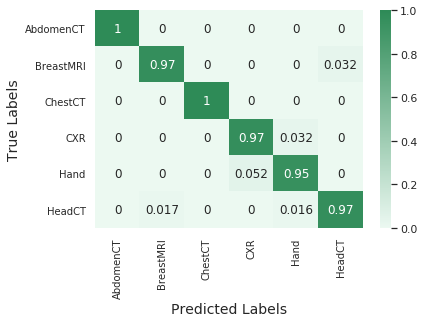

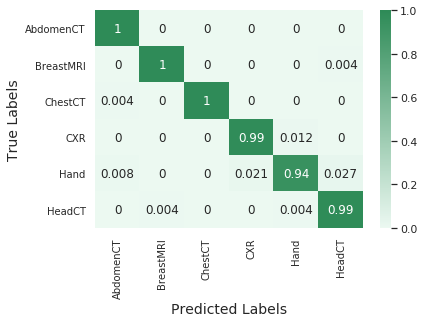

Cross Validation train accuracy = 0.98382876920616, test accuracy = 0.9787910684462409


''

In [158]:
#we are doing cross validation with number of gaussians = 2 in this block of code
#Also keep in mind, we are using only 1/nth of the data and n is defined above
cross_validate_gmmbayes(X_train_gmm, y_train_gmm, 5, num_gauss=2)

## Testing GMM 
### Modelling Class conditional densities of all classes as Sum of 1 gaussians (which is optimal as found above)

--------------------------------------------------
iteration No. 0----------LogLikelihood = 217.21895046819282
--------------------------------------------------


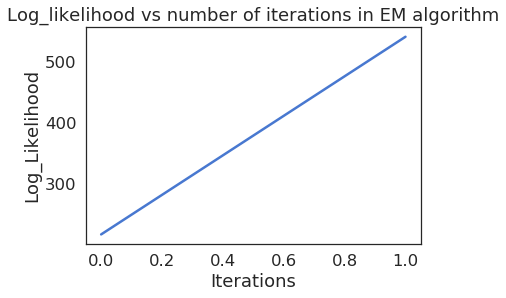

Final log likelihood = 540.2162570091612
--------------------------------------------------
iteration No. 0----------LogLikelihood = -23.223784914451105
--------------------------------------------------


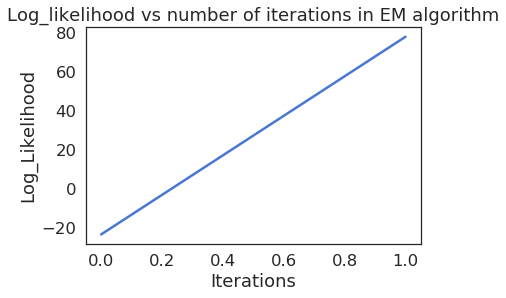

Final log likelihood = 77.77716701402096
--------------------------------------------------
iteration No. 0----------LogLikelihood = 860.5295124783647
--------------------------------------------------


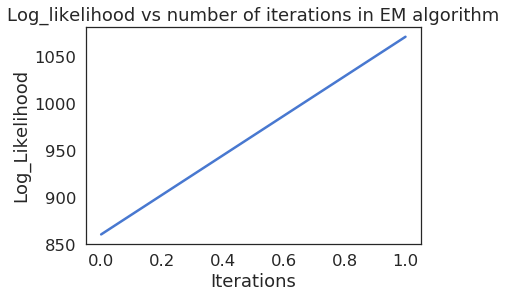

Final log likelihood = 1071.7927482330101
--------------------------------------------------
iteration No. 0----------LogLikelihood = -446.41904775675675
--------------------------------------------------


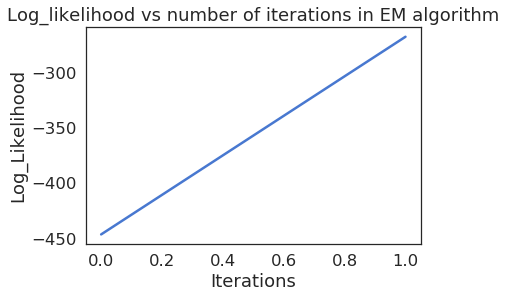

Final log likelihood = -267.6764937572884
--------------------------------------------------
iteration No. 0----------LogLikelihood = -467.79630180327837
--------------------------------------------------


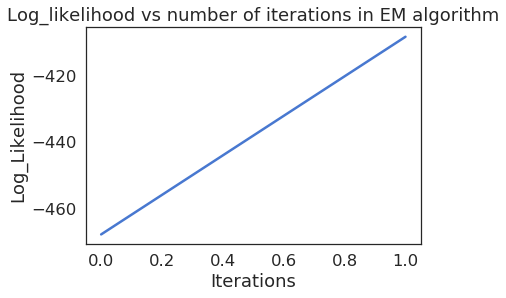

Final log likelihood = -408.2425645773465
--------------------------------------------------
iteration No. 0----------LogLikelihood = -1095.5553128416732
--------------------------------------------------


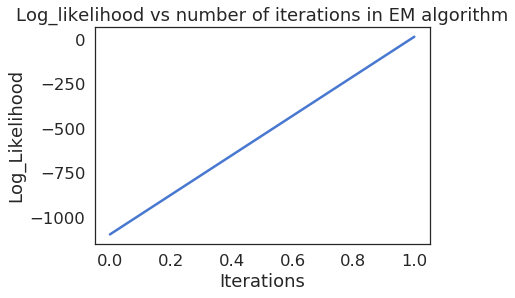

Final log likelihood = 16.60074618173603


In [104]:
#Note we are testing on the whole pca test set but we had trained on 1/nth of the data only
# for classifying test data we first model all the classes of the train data
priors_GMM = getpriors(y_train_gmm)
gmm_params = get_gmm_params(X_train_gmm, y_train_gmm, num_gauss = 1, iter_max = 100, stop_thresh = 0.0001)

Test data stats
Macro F1 = 0.97091, Accuracy = 0.97108
       class  Precision   Recall       F1
0  AbdomenCT    0.99346  0.98750  0.99047
1  BreastMRI    0.94751  0.98772  0.96720
2    ChestCT    0.98716  0.99950  0.99329
3        CXR    0.96796  0.98200  0.97493
4       Hand    0.97633  0.92800  0.95155
5     HeadCT    0.95255  0.94350  0.94800


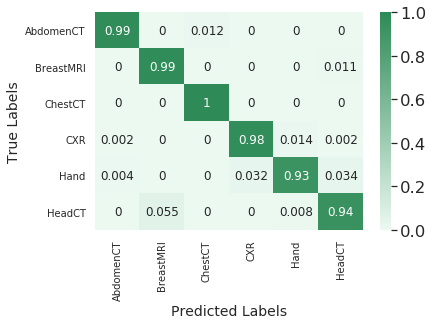


Train data stats
Macro F1 = 0.97175, Accuracy = 0.9719
       class  Precision   Recall       F1
0  AbdomenCT    0.99687  0.98758  0.99220
1  BreastMRI    0.94326  0.98155  0.96202
2    ChestCT    0.98762  1.00000  0.99377
3        CXR    0.96238  0.98397  0.97306
4       Hand    0.98142  0.93787  0.95915
5     HeadCT    0.95625  0.94444  0.95031


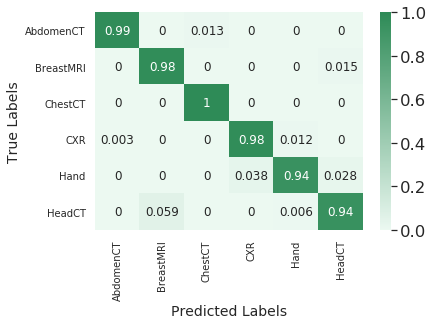

In [107]:
print('Test data stats')
y_pred_test_gmm = prediction_gmm(X_test_pca, priors_GMM, gmm_params, num_gauss = 1)
conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm, plt = performance_metrics_multiclass(y_pred_test_gmm, y_test, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
print(stats_df_norm_gmm)
# stats_df_norm_gmm.to_csv('./Report/csvfiles/medical_gmm_test.csv')
# plt.savefig('./Report/plots/Medical_gmm_confmat_test.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

print('\nTrain data stats')
y_pred_train_gmm = prediction_gmm(X_train_gmm, priors_GMM, gmm_params, num_gauss = 1)
conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm, plt = performance_metrics_multiclass(y_pred_train_gmm, y_train_gmm, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
print(stats_df_norm_gmm)
# stats_df_norm_gmm.to_csv('./Report/csvfiles/medical_gmm_train.csv')
# plt.savefig('./Report/plots/Medical_gmm_confmat_train.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

### Modelling Class conditional densities of all classes as Sum of 2 gaussians (which is optimal as found above)

--------------------------------------------------
iteration No. 0----------LogLikelihood = 323.65006516871256
iteration No. 10----------LogLikelihood = 587.1841770951208
iteration No. 20----------LogLikelihood = 600.3608274997728
iteration No. 30----------LogLikelihood = 603.3529141447925
iteration No. 40----------LogLikelihood = 603.4600530016303
iteration No. 50----------LogLikelihood = 603.4655948173735
--------------------------------------------------


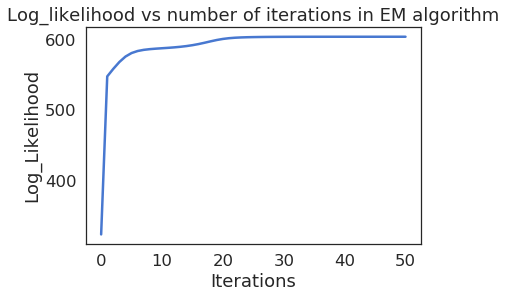

Final log likelihood = 603.4655948173735
--------------------------------------------------
iteration No. 0----------LogLikelihood = 2.5101748303139484
iteration No. 10----------LogLikelihood = 117.16652244663051
iteration No. 20----------LogLikelihood = 117.26085923029757
iteration No. 30----------LogLikelihood = 117.26471305515824
--------------------------------------------------


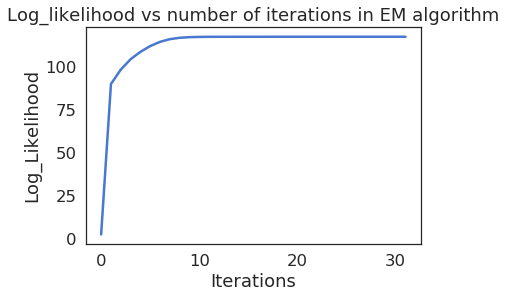

Final log likelihood = 117.26483296277513
--------------------------------------------------
iteration No. 0----------LogLikelihood = 960.3151537634316
iteration No. 10----------LogLikelihood = 1116.8550377456907
iteration No. 20----------LogLikelihood = 1118.7465621035917
iteration No. 30----------LogLikelihood = 1119.6818455166087
iteration No. 40----------LogLikelihood = 1119.9704184611974
iteration No. 50----------LogLikelihood = 1120.0182673429267
iteration No. 60----------LogLikelihood = 1120.0247272424028
--------------------------------------------------


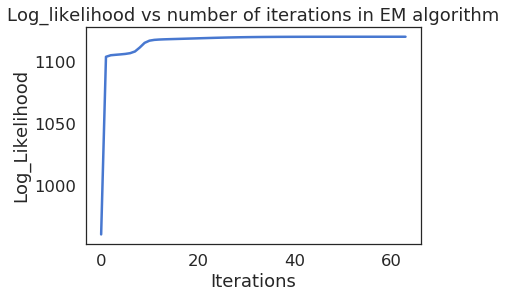

Final log likelihood = 1120.0251617082006
--------------------------------------------------
iteration No. 0----------LogLikelihood = -327.06750353554037
iteration No. 10----------LogLikelihood = -218.48653374566015
iteration No. 20----------LogLikelihood = -211.19801713030338
iteration No. 30----------LogLikelihood = -208.89460799850332
iteration No. 40----------LogLikelihood = -208.7530588127813
--------------------------------------------------


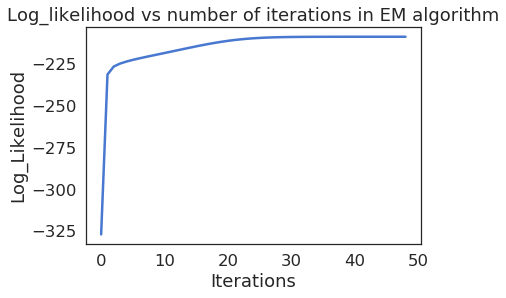

Final log likelihood = -208.7487674458093
--------------------------------------------------
iteration No. 0----------LogLikelihood = -529.9929863185778
iteration No. 10----------LogLikelihood = -171.54640307142608
--------------------------------------------------


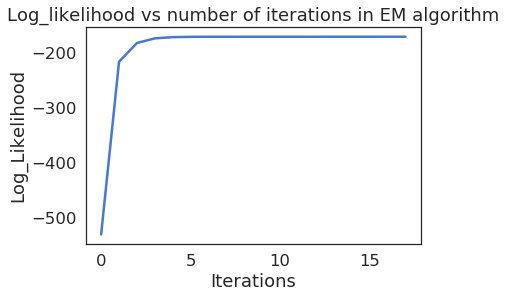

Final log likelihood = -171.54286691957213
--------------------------------------------------
iteration No. 0----------LogLikelihood = -32.90957344222812
iteration No. 10----------LogLikelihood = 55.3793433121373
iteration No. 20----------LogLikelihood = 69.93383533935308
iteration No. 30----------LogLikelihood = 75.32137790198776
iteration No. 40----------LogLikelihood = 82.47961676137623
iteration No. 50----------LogLikelihood = 91.39634322149848
iteration No. 60----------LogLikelihood = 91.42550382084129
--------------------------------------------------


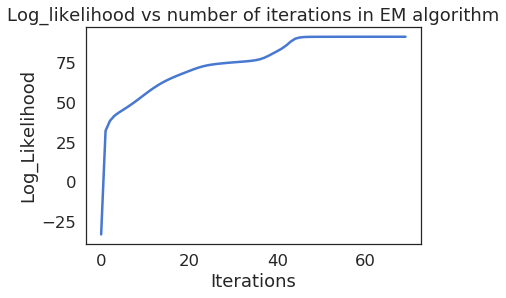

Final log likelihood = 91.42873809763464


In [109]:
#Note we are testing on the whole pca test set but we had trained on 1/nth of the data only
# for classifying test data we first model all the classes of the train data
priors_GMM = getpriors(y_train_gmm)
gmm_params = get_gmm_params(X_train_gmm, y_train_gmm, num_gauss = 2, iter_max = 100, stop_thresh = 0.0001)

Test data stats
Macro F1 = 0.97591, Accuracy = 0.97583
       class  Precision   Recall       F1
0  AbdomenCT    0.99596  0.98700  0.99146
1  BreastMRI    0.98214  0.98269  0.98241
2    ChestCT    0.98764  0.99900  0.99329
3        CXR    0.97203  0.97300  0.97251
4       Hand    0.96313  0.94050  0.95168
5     HeadCT    0.95488  0.97350  0.96410


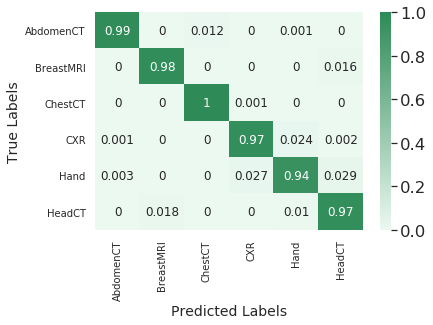


Train data stats
Macro F1 = 0.9764, Accuracy = 0.97614
       class  Precision   Recall       F1
0  AbdomenCT    0.99688  0.99379  0.99533
1  BreastMRI    0.97794  0.98155  0.97974
2    ChestCT    0.99375  0.99687  0.99531
3        CXR    0.96805  0.97115  0.96960
4       Hand    0.96667  0.94379  0.95509
5     HeadCT    0.95455  0.97222  0.96330


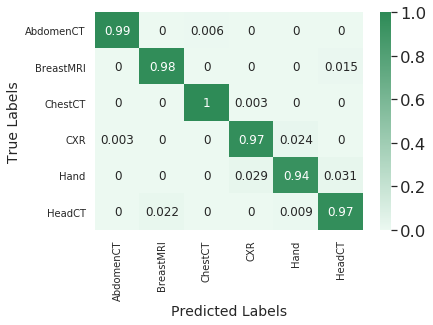

In [110]:
print('Test data stats')
y_pred_test_gmm = prediction_gmm(X_test_pca, priors_GMM, gmm_params, num_gauss = 2)
conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm, plt = performance_metrics_multiclass(y_pred_test_gmm, y_test, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
print(stats_df_norm_gmm)
# stats_df_norm_gmm.to_csv('./Report/csvfiles/medical_gmm_test.csv')
# plt.savefig('./Report/plots/Medical_gmm_confmat_test.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

print('\nTrain data stats')
y_pred_train_gmm = prediction_gmm(X_train_gmm, priors_GMM, gmm_params, num_gauss = 2)
conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm, plt = performance_metrics_multiclass(y_pred_train_gmm, y_train_gmm, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
print(stats_df_norm_gmm)
# stats_df_norm_gmm.to_csv('./Report/csvfiles/medical_gmm_train.csv')
# plt.savefig('./Report/plots/Medical_gmm_confmat_train.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

### Experiments with GMM

1. Even with 1/n = 1/25 of the data, the accuracy of gmm is higher than bith bayes as well as naive bayes algorithms which is very interesting Question arisis how low can we go on training data to still produce the same accuracy? 
2. Do naive bayes and bayes also perform well with less data?  ---->This is expected I think because the pca plots are highly clustered and the 50k training points are highly densely clustered withing clusters which suggests that even with less data these algorithms should work fine.

# Parzen
### Window functions - hypercube, gaussian kernel

In [111]:
n = 10
X_train_parzen = X_train_pca[0:5000]
y_train_parzen = y_train[0:5000]
X_test_parzen = X_test_pca[0:5000]
y_test_parzen = y_test[0:5000]

In [112]:
def unit_hypercube(x, X_train, h):
    '''x is a 1d vector'''
    u = (x.reshape(1, X_train.shape[1]) - X_train)/h
#     print(u)
    assert(u.shape == X_train.shape)
    u_mod = np.absolute(u)
    u_mod_poswindow = np.all((u_mod<=1/2), axis = 1)
    assert(u_mod_poswindow.shape == (X_train.shape[0],))
    prob = (1/X_train.shape[0]) * (1/(h**(X_train.shape[1]))) * np.sum(u_mod_poswindow)
#     print(prob)
    return prob
    
def gauss_ker_apply(u):
    '''u is a 1d array'''
    return np.exp(-0.5 * ((np.linalg.norm(u))**2))
    
def gaussian_kernel(x, X_train, h):
    '''x is a 1d vector'''
    n, d = X_train.shape
    u = (x.reshape(1, X_train.shape[1]) - X_train)/(h/np.sqrt(n))
    assert(u.shape == X_train.shape)
    kernel_applied = np.apply_along_axis(gauss_ker_apply, 1, u)
    
    prob = (1/((h*np.sqrt(2*np.pi * n))**(d))) * np.sum(kernel_applied)
    return prob

    return 1/(np.sqrt(2*np.pi))*np.exp(-1 * np.linalg.norm(x))
    
def likelihood_parzen(x, X_train, windowfn, h):
    if(windowfn == 'hypercube'):
        return unit_hypercube(x, X_train, h)
    else:
        return gaussian_kernel(x, X_train, h)
    
def parzen_classify(h, X_train, y_train, X_test, priors, windowfn):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            lik = likelihood_parzen(X_test[i], X_train[np.where(y_train==j)], windowfn, h)
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j
      
    return y_pred_test


### Parzen - Bias Variance Curves 
model complexity increases with decrease in h - window length

In [184]:
# data used for bias variance curve is a subset of the test data. To make this curve 
# we would not be cross validating to save time
#for making the curve we are using 5000 train points and 500 validation points
n = 10
X_train_parzenBV = X_train_pca[0:5000]
y_train_parzenBV = y_train[0:5000]
X_valid_parzenBV = X_train_pca[5000:5500]
y_valid_parzenBV = y_train[5000:5500]
print(X_train_parzenBV.shape, y_train_parzenBV.shape, X_valid_parzenBV.shape, y_valid_parzenBV.shape)
print(np.unique(y_valid_parzenBV, return_counts = True))

(5000, 2) (5000,) (500, 2) (500,)
(array([0, 1, 2, 3, 4, 5], dtype=uint8), array([100,  81,  75,  80,  80,  84]))


### For Hypercube window function

In [185]:
train_acc_list = []
valid_acc_list = [] 
hrange = [0.05, 0.1, 0.15, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1]
for h in hrange:
    priors_parzen = getpriors(y_train_parzenBV)
    
    #Validation stats
    y_pred_valid_parzen = parzen_classify(h, X_train_parzenBV, y_train_parzenBV, X_valid_parzenBV, priors_parzen, 'hypercube')
    conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_valid = performance_metrics_multiclass(y_pred_valid_parzen, y_valid_parzenBV, numcat, disp_conf = False)
    
    #Train stats
    y_pred_train_parzen = parzen_classify(h, X_train_parzenBV, y_train_parzenBV, X_train_parzenBV, priors_parzen, 'hypercube')
    conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_train = performance_metrics_multiclass(y_pred_train_parzen, y_train_parzenBV, numcat, disp_conf = False)

    
    train_acc_list.append(accuracy_train)
    valid_acc_list.append(accuracy_valid)
    print('Window length h = {}, validation accuracy = {}'.format(h, accuracy_valid))

print('The highest validation accuracy is achieved at h = {}'.format(hrange[np.argmax(np.array(valid_acc_list))]))

Window length h = 0.05, validation accuracy = 0.886
Window length h = 0.1, validation accuracy = 0.954
Window length h = 0.15, validation accuracy = 0.966
Window length h = 0.17, validation accuracy = 0.974
Window length h = 0.18, validation accuracy = 0.972
Window length h = 0.19, validation accuracy = 0.974
Window length h = 0.2, validation accuracy = 0.976
Window length h = 0.21, validation accuracy = 0.978
Window length h = 0.22, validation accuracy = 0.974
Window length h = 0.3, validation accuracy = 0.97
Window length h = 0.4, validation accuracy = 0.97
Window length h = 0.6, validation accuracy = 0.968
Window length h = 0.7, validation accuracy = 0.964
Window length h = 0.8, validation accuracy = 0.96
Window length h = 0.9, validation accuracy = 0.958
Window length h = 1, validation accuracy = 0.948
The highest validation accuracy is achieved at h = 0.21


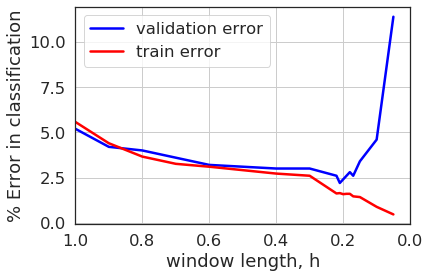

In [186]:
train_error_parzen = 1 - np.array(train_acc_list)
valid_error_parzen = 1 - np.array(valid_acc_list)
plt.plot(hrange, valid_error_parzen*100, label = 'validation error', color = 'b')
plt.plot(hrange, train_error_parzen*100, label = 'train error', color = 'r')
plt.xlabel('window length, h')
plt.ylabel('% Error in classification')
ax = plt.gca()
ax.set_xlim(1, 0)  # decreasing time
# ax.set_facecolor('white')
ax.grid(b=True, which='major', linestyle='-')
sb.set_style("white")
plt.legend()
# plt.savefig('./Report/plots/Medical_parzen_hypercube_biasvar.jpeg', dpi = 300, bbox_inches = 'tight')

Hence we conclude that the optimal modelcapacity/ in this case its the optimal value of __h = 0.21__ below and above which the validation error increases

### For gaussian kernel window function

In [187]:
# data used for bias variance curve is a subset of the test data. To make this curve 
# we would not be cross validating to save time
#for making the curve we are using 1000 train points and 500 validation points
n = 10
X_train_parzenBV = X_train_pca[0:1000]
y_train_parzenBV = y_train[0:1000]
X_valid_parzenBV = X_train_pca[1000:1500]
y_valid_parzenBV = y_train[1000:1500]
print(X_train_parzenBV.shape, y_train_parzenBV.shape, X_valid_parzenBV.shape, y_valid_parzenBV.shape)
print(np.unique(y_valid_parzenBV, return_counts = True))

(1000, 2) (1000,) (500, 2) (500,)
(array([0, 1, 2, 3, 4, 5], dtype=uint8), array([85, 72, 74, 88, 96, 85]))


In [188]:
train_acc_list = []
valid_acc_list = [] 
hrange = [0.05, 0.1, 0.15, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1]
for h in hrange:
    priors_parzen = getpriors(y_train_parzenBV)
    
    #Validation stats
    y_pred_valid_parzen = parzen_classify(h, X_train_parzenBV, y_train_parzenBV, X_valid_parzenBV, priors_parzen, 'gaussian')
    conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_valid = performance_metrics_multiclass(y_pred_valid_parzen, y_valid_parzenBV, numcat, disp_conf = False)
    
    #Train stats
    y_pred_train_parzen = parzen_classify(h, X_train_parzenBV, y_train_parzenBV, X_train_parzenBV, priors_parzen, 'gaussian')
    conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_train = performance_metrics_multiclass(y_pred_train_parzen, y_train_parzenBV, numcat, disp_conf = False)

    
    train_acc_list.append(accuracy_train)
    valid_acc_list.append(accuracy_valid)
    print('Window length h = {}, validation accuracy = {}'.format(h, accuracy_valid))

print('The highest validation accuracy for gaussian kernel is achieved at h = {}'.format(hrange[np.argmax(np.array(valid_acc_list))]))

Window length h = 0.05, validation accuracy = 0.942
Window length h = 0.1, validation accuracy = 0.956
Window length h = 0.15, validation accuracy = 0.956
Window length h = 0.17, validation accuracy = 0.958
Window length h = 0.18, validation accuracy = 0.958
Window length h = 0.19, validation accuracy = 0.958
Window length h = 0.2, validation accuracy = 0.96
Window length h = 0.21, validation accuracy = 0.96
Window length h = 0.22, validation accuracy = 0.96
Window length h = 0.3, validation accuracy = 0.96
Window length h = 0.4, validation accuracy = 0.962
Window length h = 0.6, validation accuracy = 0.966
Window length h = 0.7, validation accuracy = 0.97
Window length h = 0.8, validation accuracy = 0.972
Window length h = 0.9, validation accuracy = 0.972
Window length h = 1, validation accuracy = 0.97
The highest validation accuracy for gaussian kernel is achieved at h = 0.8


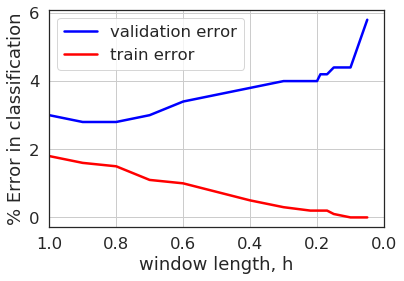

In [189]:
train_error_parzen = 1 - np.array(train_acc_list)
valid_error_parzen = 1 - np.array(valid_acc_list)
plt.plot(hrange, valid_error_parzen*100, label = 'validation error', color = 'b')
plt.plot(hrange, train_error_parzen*100, label = 'train error', color = 'r')
plt.xlabel('window length, h')
plt.ylabel('% Error in classification')
ax = plt.gca()
ax.set_xlim(1, 0)  # decreasing time
# ax.set_facecolor('white')
ax.grid(b=True, which='major', linestyle='-')
sb.set_style("white")
plt.legend()
# plt.savefig('./Report/plots/Medical_parzen_gaussian_biasvar.jpeg', dpi = 300, bbox_inches = 'tight')

h = 0.8 is the optimal hyperparameter for the gaussian kernel
We also see that gaussian kernel is producing much less error as compared to hypercube (see previous plot)

## Cross Validating Parzen window for optimal h found above
we finally need, 
1. 5 fold cross validation train and test( should be validation) accuracies.
2. confusion maatrix for 80percent train and 20 percent test data - and get per class precision recall and F1 and finally macro F1

In [143]:
def cross_validate_parzen(X_train, y_train ,k, h, kernel): 
    #data is already shuffled before so no need to do that again
    
    #Kfoldsplit is a list of k (almost) equal sized parts of the np array
    Kfoldsplit_X = np.array_split(X_train, k, axis = 0)
    Kfoldsplit_y = np.array_split(y_train, k, axis = 0)
    
    #Use test_score and train_score to store the metric you want to analyse i.e. accuracy, precision, 
    cv_train_accuracy = 0  
    cv_valid_accuracy = 0
    for i in range(k):
        print('Cross validation Fold {} running'.format(i+1))
        #make train and validation sets
        valid_X, valid_y = Kfoldsplit_X[i], Kfoldsplit_y[i]
        train_X, train_y = np.concatenate(Kfoldsplit_X[:i]+Kfoldsplit_X[i+1:], axis = 0), np.concatenate(Kfoldsplit_y[:i]+Kfoldsplit_y[i+1:], axis = 0)
        
        #training phase
        priors_parzen = getpriors(train_y)

        #Validation stats
        y_pred_valid_parzen = parzen_classify(h, train_X, train_y, valid_X, priors_parzen, kernel)
        conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_valid, plt = performance_metrics_multiclass(y_pred_valid_parzen, valid_y, numcat, disp_conf = True)
        plt.show()
        assert(valid_y.shape == y_pred_valid_parzen.shape)
        
        #Train stats
        y_pred_train_parzen = parzen_classify(h, train_X, train_y, train_X, priors_parzen, kernel)
        conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_train, plt = performance_metrics_multiclass(y_pred_train_parzen, train_y, numcat, disp_conf = True)
        plt.show()

        train_acc_list.append(accuracy_train)
        valid_acc_list.append(accuracy_valid)
        
        
        cv_train_accuracy += accuracy_train   
        cv_valid_accuracy += accuracy_valid
    print('Cross Validation train accuracy = {}, test accuracy = {}'.format(cv_train_accuracy/k, cv_valid_accuracy/k))        
    return round(cv_train_accuracy/k, 5), round(cv_valid_accuracy/k, 5)

__cross validation for hypercube__

Cross validation Fold 1 running


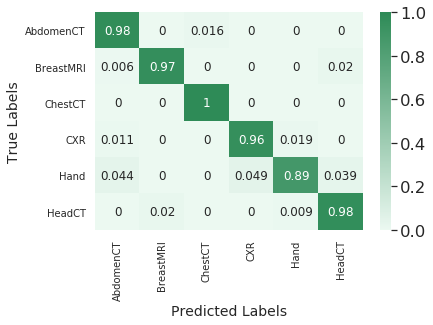

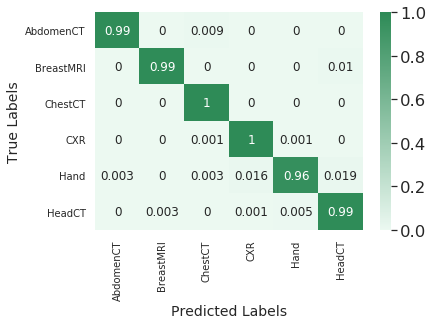

Cross validation Fold 2 running


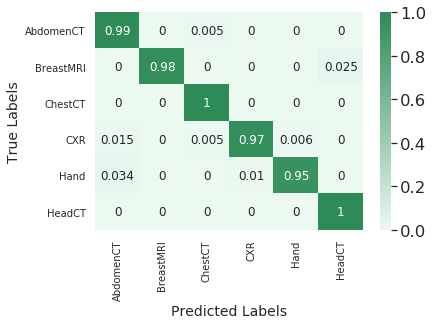

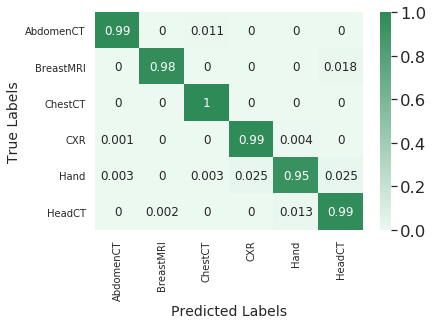

Cross validation Fold 3 running


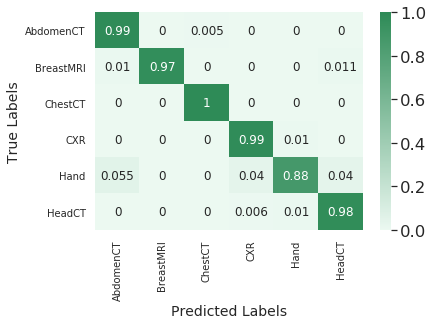

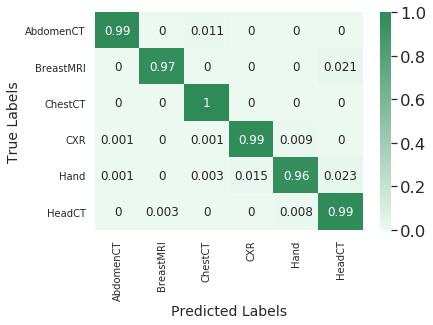

Cross validation Fold 4 running


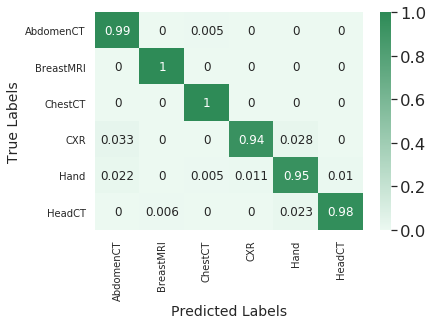

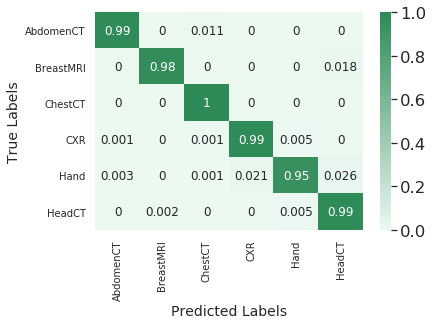

Cross validation Fold 5 running


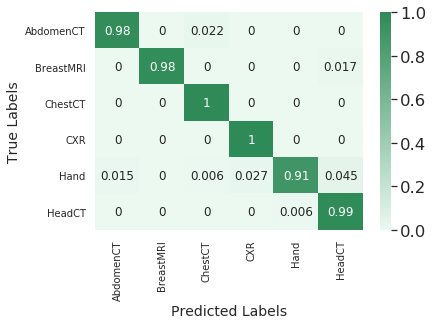

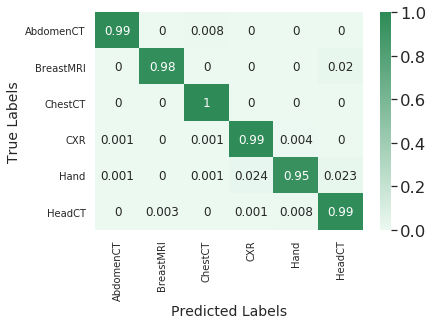

Cross Validation train accuracy = 0.9844079999999998, test accuracy = 0.97309


(0.98441, 0.97309)

In [144]:
h = 0.21
n = 5
# we cross validate using on only 5500 datapoints of the original 50000 training data
# Data is already randomized so no need to randomize again
cross_validate_parzen(X_train_pca[0:5500], y_train[0:5500], 5, h, kernel = 'hypercube')

__cross validation for gaussian window function__

Cross validation Fold 1 running


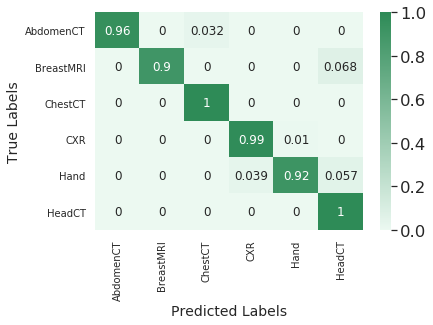

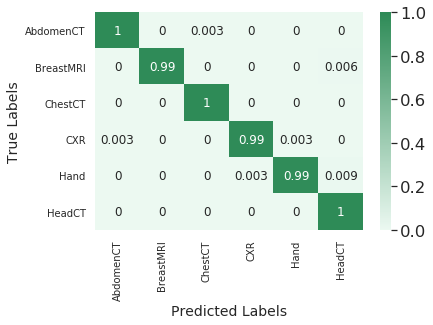

Cross validation Fold 2 running


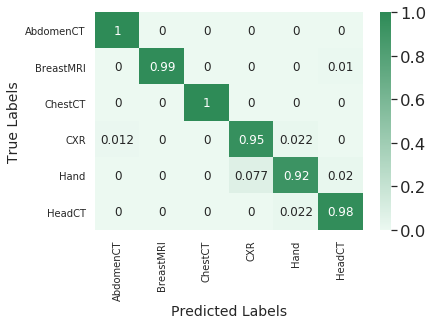

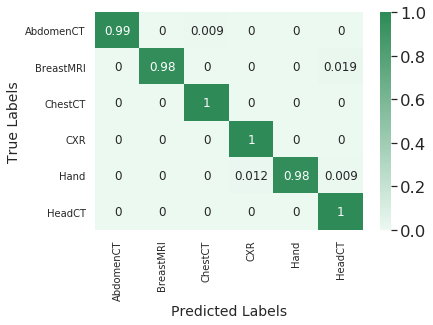

Cross validation Fold 3 running


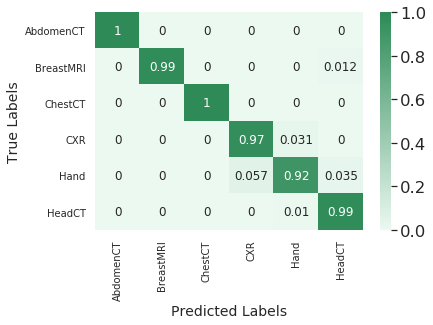

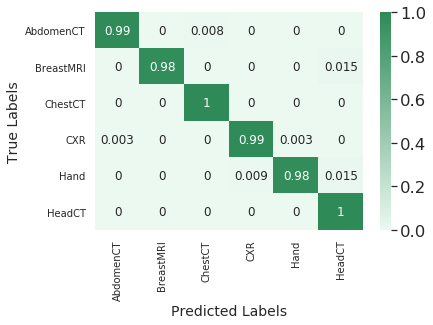

Cross validation Fold 4 running


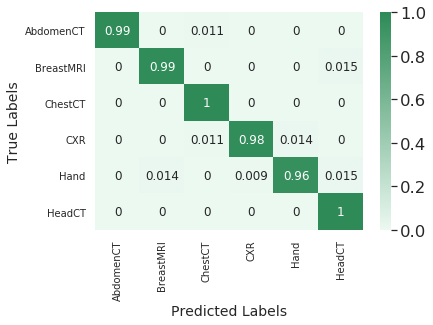

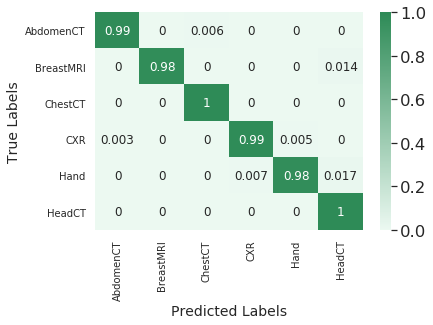

Cross validation Fold 5 running


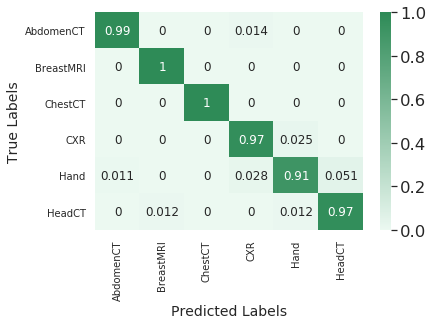

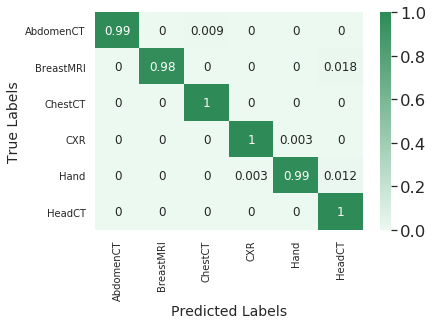

Cross Validation train accuracy = 0.9924, test accuracy = 0.9747999999999999


(0.9924, 0.9748)

In [145]:
h = 0.8#optimal va;ue found above for gaussian window
n = 20
# we use only 2500 train data out of total 50k for cross validating gaussian window parzen
# Data is already randomized so no need to randomize again
cross_validate_parzen(X_train_pca[0:2500], y_train[0:2500], 5, h, kernel = 'gaussian')

# Testing Parzen

### Hypercube window

Test data stats
Macro F1 = 0.97552, Accuracy = 0.975


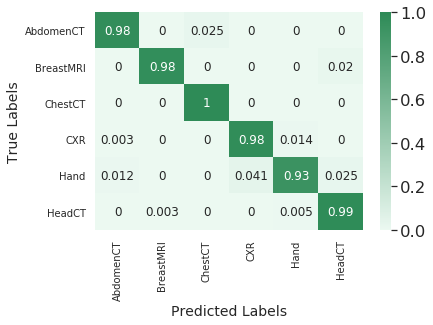

       class  Precision   Recall       F1
0  AbdomenCT    0.98521  0.97654  0.98086
1  BreastMRI    0.99650  0.97603  0.98616
2    ChestCT    0.97605  1.00000  0.98788
3        CXR    0.95988  0.98107  0.97036
4       Hand    0.98006  0.92973  0.95423
5     HeadCT    0.95640  0.99153  0.97365
Train data stats
Macro F1 = 0.9809, Accuracy = 0.9809


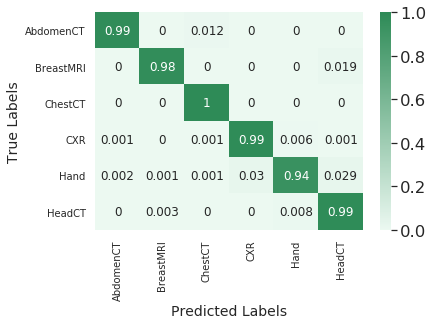

       class  Precision   Recall       F1
0  AbdomenCT    0.99705  0.98772  0.99236
1  BreastMRI    0.99659  0.97922  0.98783
2    ChestCT    0.98588  1.00000  0.99289
3        CXR    0.97095  0.98993  0.98035
4       Hand    0.98518  0.93824  0.96114
5     HeadCT    0.95257  0.98978  0.97082


In [153]:
h = 0.21
#using a subset of total train and test data only
trainsize = 10000
testsize = 2000
priors_parzen = getpriors(y_train[0:trainsize])

print('Test data stats')
y_pred_test_parzen = parzen_classify(h,X_train_pca[0:trainsize], y_train[0:trainsize], X_test_pca[0:testsize], priors_parzen, 'hypercube')
conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_norm_parzen, plt = performance_metrics_multiclass(y_pred_test_parzen, y_test[0:testsize], numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_parzen, accuracy_norm_parzen))
# stats_df_norm_parzen.to_csv('./Report/csvfiles/medical_parzenhypercube_test.csv')
# plt.savefig('./Report/plots/Medical_parzenhypercube_confmat_test.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()
print(stats_df_norm_parzen)

print('Train data stats')
y_pred_train_parzen = parzen_classify(h,X_train_pca[0:trainsize], y_train[0:trainsize], X_train_pca[0:trainsize], priors_parzen, 'hypercube')
conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_norm_parzen, plt = performance_metrics_multiclass(y_pred_train_parzen, y_train[0:trainsize], numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_parzen, accuracy_norm_parzen))
# stats_df_norm_parzen.to_csv('./Report/csvfiles/medical_parzenhypercube_train.csv')
# plt.savefig('./Report/plots/Medical_parzenhypecube_confmat_train.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()
print(stats_df_norm_parzen)


### Gaussian window

Test data stats
Macro F1 = 0.97379, Accuracy = 0.974


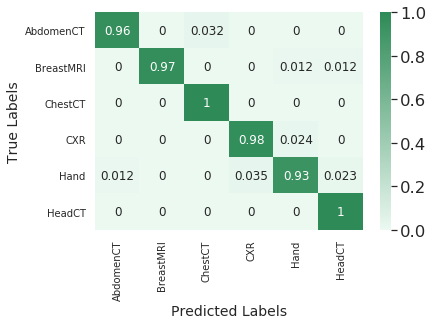

       class  Precision   Recall       F1
0  AbdomenCT    0.98718  0.96250  0.97468
1  BreastMRI    1.00000  0.97222  0.98591
2    ChestCT    0.96939  1.00000  0.98446
3        CXR    0.96512  0.97647  0.97076
4       Hand    0.96203  0.92683  0.94410
5     HeadCT    0.96629  1.00000  0.98286
Train data stats
Macro F1 = 0.99244, Accuracy = 0.9925


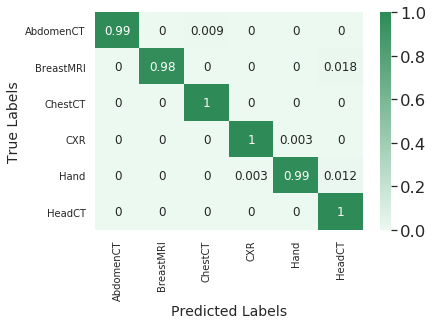

       class  Precision   Recall       F1
0  AbdomenCT    1.00000  0.99135  0.99566
1  BreastMRI    1.00000  0.97872  0.98925
2    ChestCT    0.99112  1.00000  0.99554
3        CXR    0.99704  0.99704  0.99704
4       Hand    0.99716  0.98596  0.99153
5     HeadCT    0.97159  1.00000  0.98559


In [190]:
h = 0.8
#using a subset of total train and test data only
trainsize = 2000
testsize = 500
priors_parzen = getpriors(y_train[0:trainsize])

print('Test data stats')
y_pred_test_parzen = parzen_classify(h,X_train_pca[0:trainsize], y_train[0:trainsize], X_test_pca[0:testsize], priors_parzen, 'gaussian')
conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_norm_parzen, plt = performance_metrics_multiclass(y_pred_test_parzen, y_test[0:testsize], numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_parzen, accuracy_norm_parzen))
# stats_df_norm_parzen.to_csv('./Report/csvfiles/medical_parzengaussian_test.csv')
# plt.savefig('./Report/plots/Medical_parzengaussian_confmat_test.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()
print(stats_df_norm_parzen)

print('Train data stats')
y_pred_train_parzen = parzen_classify(h,X_train_pca[0:trainsize], y_train[0:trainsize], X_train_pca[0:trainsize], priors_parzen, 'gaussian')
conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_norm_parzen, plt = performance_metrics_multiclass(y_pred_train_parzen, y_train[0:trainsize], numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_parzen, accuracy_norm_parzen))
# stats_df_norm_parzen.to_csv('./Report/csvfiles/medical_parzengaussian_train.csv')
# plt.savefig('./Report/plots/Medical_parzengaussian_confmat_train.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()
print(stats_df_norm_parzen)


# KNN

In [155]:
def get_dist(x1, X):
    
    return np.linalg.norm((x1.reshape(1, X.shape[1])-X), axis = 1)

    
def knn_classify(k, X_train, y_train, X_test, priors):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        dist = get_dist(X_test[i], X_train)
        assert(dist.shape == (X_train.shape[0],))
        argsort_dist = np.argsort(dist, axis = 0)
        y_train_sorted_firstk = y_train[argsort_dist][0:k]
        y_unique, counts = np.unique(y_train_sorted_firstk, return_counts=True)
#         print(counts.shape, np.array(priors).shape)
#         print(counts)
#         print(y_unique)
#         assert(counts.shape==np.array(priors).shape==(numcat,))
        post = np.ones(counts.shape[0])
        maxpost = 0
        for j in range(counts.shape[0]):
            post[j] *= priors[y_unique[j]] * counts[j]
            if(post[j] >= maxpost):
                maxpost = post[j]
                y_pred_test[i] = y_unique[j]
        
    return y_pred_test

### KNN - Bias Variance Curves 
model complexity increases with decrease in k - window length

In [175]:
# data used for bias variance curve is a subset of the test data. To make this curve 
# we would not be cross validating to save time
#for making the curve we are using 10000 train points and 1000 validation points
X_train_knnBV = X_train_pca[0:10000]
y_train_knnBV = y_train[0:10000]
X_valid_knnBV = X_train_pca[10000:11000]
y_valid_knnBV = y_train[10000:11000]
print(X_train_knnBV.shape, y_train_knnBV.shape, X_valid_knnBV.shape, y_valid_knnBV.shape)
print(np.unique(y_valid_knnBV, return_counts = True))

(10000, 2) (10000,) (1000, 2) (1000,)
(array([0, 1, 2, 3, 4, 5], dtype=uint8), array([145, 154, 180, 181, 152, 188]))


### For Eucledian/norm 2 as Distance metric in knn

In [176]:
train_acc_list = []
valid_acc_list = [] 
krange = [i for i in range(1,21)]
for k in krange:
    priors_knn = getpriors(y_train_knnBV)
    
    #Validation stats
    y_pred_valid_knn = knn_classify(k, X_train_knnBV, y_train_knnBV, X_valid_knnBV, priors_knn)
    conf_mat_norm_knn, stats_df_norm_knn, macroF1_norm_knn, accuracy_valid = performance_metrics_multiclass(y_pred_valid_knn, y_valid_knnBV, numcat, disp_conf = False)
    
    #Train stats
    y_pred_train_knn = knn_classify(k, X_train_knnBV, y_train_knnBV, X_train_knnBV, priors_knn)
    conf_mat_norm_knn, stats_df_norm_knn, macroF1_norm_knnn, accuracy_train = performance_metrics_multiclass(y_pred_train_knn, y_train_knnBV, numcat, disp_conf = False)
    
    train_acc_list.append(accuracy_train)
    valid_acc_list.append(accuracy_valid)
    print('number of nearest neighbours, k = {}, validation accuracy = {}'.format(k, accuracy_valid))

print('The highest validation accuracy is achieved at k = {}'.format(krange[np.argmax(np.array(valid_acc_list))]))

number of nearest neighbours, k = 1, validation accuracy = 0.968
number of nearest neighbours, k = 2, validation accuracy = 0.963
number of nearest neighbours, k = 3, validation accuracy = 0.971
number of nearest neighbours, k = 4, validation accuracy = 0.966
number of nearest neighbours, k = 5, validation accuracy = 0.97
number of nearest neighbours, k = 6, validation accuracy = 0.967
number of nearest neighbours, k = 7, validation accuracy = 0.973
number of nearest neighbours, k = 8, validation accuracy = 0.971
number of nearest neighbours, k = 9, validation accuracy = 0.97
number of nearest neighbours, k = 10, validation accuracy = 0.971
number of nearest neighbours, k = 11, validation accuracy = 0.971
number of nearest neighbours, k = 12, validation accuracy = 0.97
number of nearest neighbours, k = 13, validation accuracy = 0.97
number of nearest neighbours, k = 14, validation accuracy = 0.97
number of nearest neighbours, k = 15, validation accuracy = 0.97
number of nearest neighbo

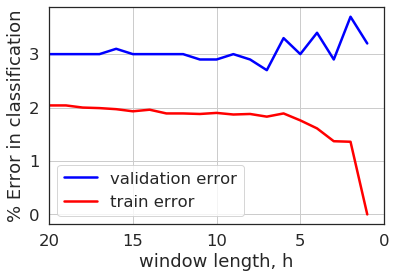

In [179]:
train_error_knn = 1 - np.array(train_acc_list)
valid_error_knn = 1 - np.array(valid_acc_list)
plt.plot(krange, valid_error_knn*100, label = 'validation error', color = 'b')
plt.plot(krange, train_error_knn*100, label = 'train error', color = 'r')
plt.xlabel('window length, h')
plt.ylabel('% Error in classification')
ax = plt.gca()
ax.set_xlim(20, 0)  # decreasing time
# ax.set_facecolor('white')
ax.grid(b=True, which='major', linestyle='-')
sb.set_style("white")
plt.legend()
# plt.savefig('./Report/plots/Medical_knn_norm2_biasvar.jpeg', dpi = 300, bbox_inches = 'tight')

Hence we conclude that the optimal modelcapacity/ in this case its the optimal value of __k = 7__ below which the validation error increases and above which the error remains almost same / increases

## Cross Validating KNN for optimal k found above
we finally need, 
1. 5 fold cross validation train and test( should be validation) accuracies.
2. confusion maatrix for 80percent train and 20 percent test data - and get per class precision recall and F1 and finally macro F1

In [169]:
def cross_validate_knn(X_train, y_train ,k, K_knn): 
    #data is already shuffled before so no need to do that again
    
    #Kfoldsplit is a list of k (almost) equal sized parts of the np array
    Kfoldsplit_X = np.array_split(X_train, k, axis = 0)
    Kfoldsplit_y = np.array_split(y_train, k, axis = 0)
    
    #Use test_score and train_score to store the metric you want to analyse i.e. accuracy, precision, 
    cv_train_accuracy = 0  
    cv_valid_accuracy = 0
    for i in range(k):
        print('Cross validation Fold {} running'.format(i+1))
        #make train and validation sets
        valid_X, valid_y = Kfoldsplit_X[i], Kfoldsplit_y[i]
        train_X, train_y = np.concatenate(Kfoldsplit_X[:i]+Kfoldsplit_X[i+1:], axis = 0), np.concatenate(Kfoldsplit_y[:i]+Kfoldsplit_y[i+1:], axis = 0)
        
        #training phase
        priors_knn = getpriors(train_y)

        print('Validation stats')
        y_pred_valid_knn = knn_classify(K_knn,  train_X, train_y, valid_X, priors_knn)
        conf_mat_norm_knn, stats_df_norm_knn, macroF1_norm_knn, accuracy_valid, plt = performance_metrics_multiclass(y_pred_valid_knn, valid_y, numcat, disp_conf = True)
        plt.show()
        
        print('Train stats')
        y_pred_train_knn = knn_classify(K_knn, train_X, train_y, train_X, priors_knn)
        conf_mat_norm_knn, stats_df_norm_knn, macroF1_norm_knnn, accuracy_train, plt = performance_metrics_multiclass(y_pred_train_knn, train_y, numcat, disp_conf = True)
        plt.show()
        
        train_acc_list.append(accuracy_train)
        valid_acc_list.append(accuracy_valid)
        
        
        cv_train_accuracy += accuracy_train   
        cv_valid_accuracy += accuracy_valid
    print('Cross Validation train accuracy = {}, test accuracy = {}'.format(cv_train_accuracy/k, cv_valid_accuracy/k))        
    return round(cv_train_accuracy/k, 5), round(cv_valid_accuracy/k,5)

__cross validation for Euclidean(Norm 2) distance in knn__

Cross validation Fold 1 running
Validation stats


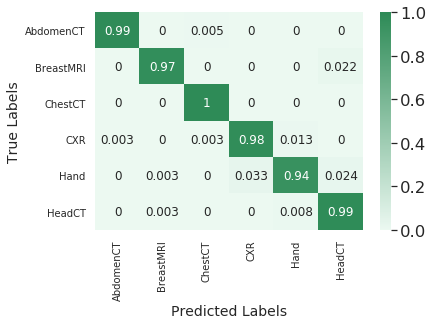

Train stats


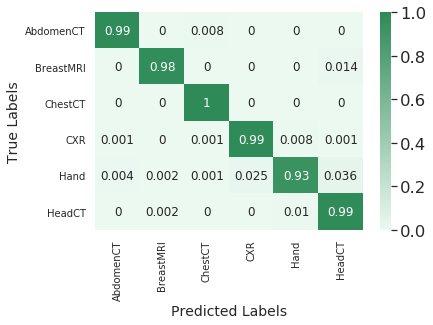

Cross validation Fold 2 running
Validation stats


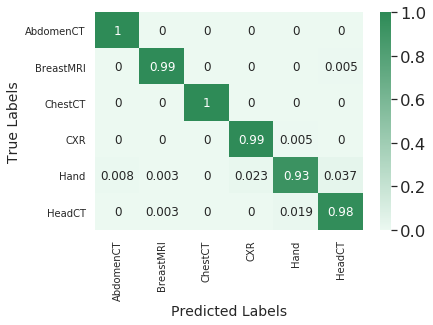

Train stats


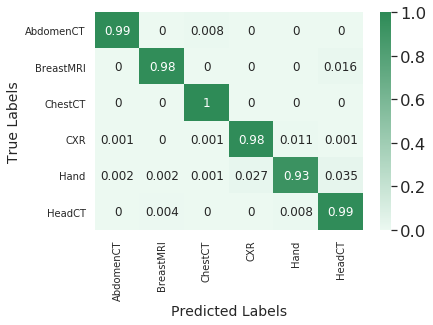

Cross validation Fold 3 running
Validation stats


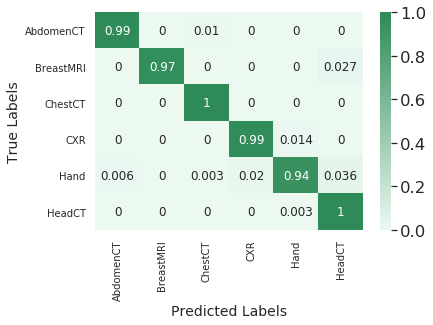

Train stats


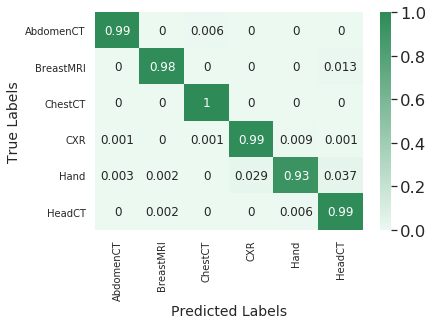

Cross validation Fold 4 running
Validation stats


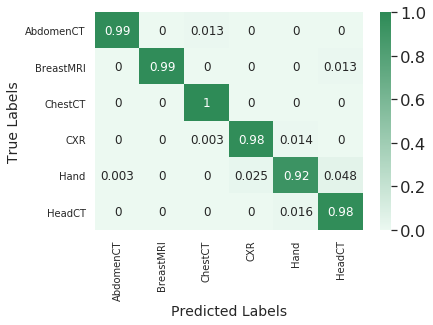

Train stats


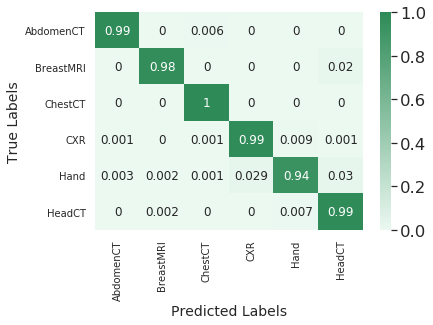

Cross validation Fold 5 running
Validation stats


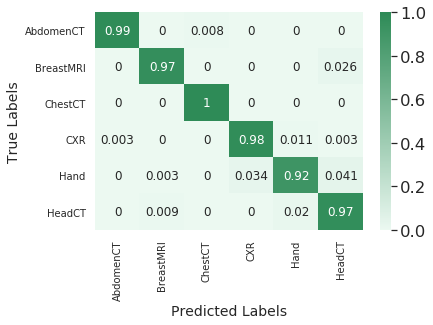

Train stats


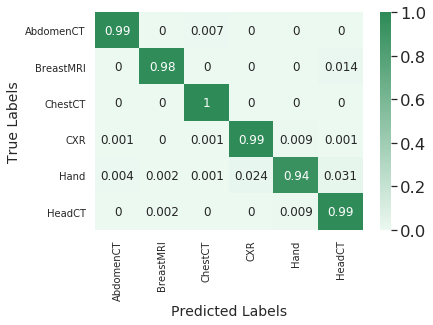

Cross Validation train accuracy = 0.981204, test accuracy = 0.978908


(0.9812, 0.97891)

In [170]:
k = 7
# note X/y_train_knn is only a subset of the original data, this is doen for faster computation 
X_train_knn = X_train_pca[0:11000]
y_train_knn = y_train[0:11000]
cross_validate_knn(X_train_knn, y_train_knn, 5, k)

# Testing KNN

### Euclidean/Norm2 as distance

Test data stats
Macro F1 = 0.98032, Accuracy = 0.98018


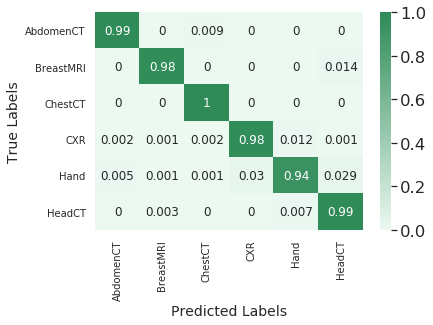

       class  Precision   Recall       F1
0  AbdomenCT    0.99251  0.99144  0.99197
1  BreastMRI    0.99576  0.98443  0.99006
2    ChestCT    0.98830  1.00000  0.99412
3        CXR    0.97057  0.98160  0.97605
4       Hand    0.97942  0.93471  0.95654
5     HeadCT    0.95708  0.98984  0.97318

Train data stats
Macro F1 = 0.98032, Accuracy = 0.98155


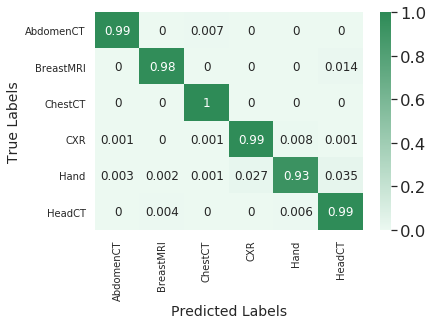

       class  Precision   Recall       F1
0  AbdomenCT    0.99567  0.99245  0.99406
1  BreastMRI    0.99448  0.98420  0.98931
2    ChestCT    0.99125  1.00000  0.99561
3        CXR    0.97366  0.98876  0.98115
4       Hand    0.98462  0.93305  0.95814
5     HeadCT    0.95223  0.99028  0.97088


In [191]:
k = 7
# note X/y_train_knn is only a subset of the original data, this is doen for faster computation 
X_train_knn = X_train_pca[0:11000]
y_train_knn = y_train[0:11000]
X_test_knn = X_test_pca[0:11000]
y_test_knn = y_test[0:11000]
priors_knn = getpriors(y_train_knn)

print('Test data stats')
y_pred_test_knn = knn_classify(k, X_train_knn, y_train_knn, X_test_knn, priors_knn)
conf_mat_norm_knn, stats_df_norm_knn, macroF1_norm_knn, accuracy_test, plt = performance_metrics_multiclass(y_pred_test_knn, y_test_knn, numcat, disp_conf = True)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_knn, accuracy_test))
# stats_df_norm_knn.to_csv('./Report/csvfiles/medical_knn_norm2_test.csv')
# plt.savefig('./Report/plots/Medical_knn_norm2_confmat_test.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()
print(stats_df_norm_knn)

print('\nTrain data stats')
y_pred_train_knn = knn_classify(k, X_train_knn, y_train_knn, X_train_knn, priors_knn)
conf_mat_norm_knn, stats_df_norm_knn, macroF1_norm_knnn, accuracy_train, plt = performance_metrics_multiclass(y_pred_train_knn, y_train_knn, numcat, disp_conf = True)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_knn, accuracy_train))
# stats_df_norm_knn.to_csv('./Report/csvfiles/medical_knn_norm2_train.csv')
# plt.savefig('./Report/plots/Medical_knn_norm2_confmat_train.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()
print(stats_df_norm_knn)


# Visualizing some data

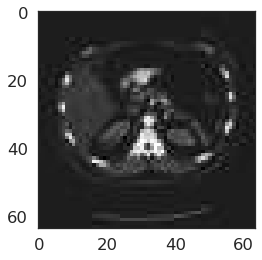

In [200]:
directory = r'./Medical_MNIST/'
image_np = np.array(Image.open(os.path.join(directory + 'AbdomenCT', '000000.jpeg')))
imshow(image_np/255, cmap = 'gray')
# img.show()

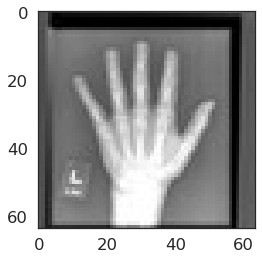

In [201]:
directory = r'./Medical_MNIST/'
image_np = np.array(Image.open(os.path.join(directory + 'Hand', '000001.jpeg')))
imshow(image_np/255, cmap = 'gray')
# img.show()

# Linear Model (Multinomial logistic done in separate notebook)